In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv("/kaggle/input/implied-volatility/option_implied_v.csv")

In [4]:
df

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price
0,2019-04-02,2019-04-04,1,10000.0,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,18.0825,1717.00
1,2019-04-02,2019-04-04,1,10050.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,18.0825,1667.05
2,2019-04-02,2019-04-04,1,10100.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,18.0825,1617.05
3,2019-04-02,2019-04-04,1,10150.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,18.0825,1567.10
4,2019-04-02,2019-04-04,1,10200.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,18.0825,1517.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2024-03-28,2028-12-28,0,23000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,12.8325,355.80
2646192,2024-03-28,2028-12-28,0,24000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,12.8325,493.50
2646193,2024-03-28,2028-12-28,0,25000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,12.8325,664.00
2646194,2024-03-28,2028-12-28,0,26000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,12.8325,869.65


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week

In [7]:
df

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price,year,month,day,day_of_week
0,2019-04-02,2019-04-04,1,10000.0,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,18.0825,1717.00,2019,4,2,1
1,2019-04-02,2019-04-04,1,10050.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,18.0825,1667.05,2019,4,2,1
2,2019-04-02,2019-04-04,1,10100.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,18.0825,1617.05,2019,4,2,1
3,2019-04-02,2019-04-04,1,10150.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,18.0825,1567.10,2019,4,2,1
4,2019-04-02,2019-04-04,1,10200.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,18.0825,1517.10,2019,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2024-03-28,2028-12-28,0,23000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,12.8325,355.80,2024,3,28,3
2646192,2024-03-28,2028-12-28,0,24000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,12.8325,493.50,2024,3,28,3
2646193,2024-03-28,2028-12-28,0,25000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,12.8325,664.00,2024,3,28,3
2646194,2024-03-28,2028-12-28,0,26000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,12.8325,869.65,2024,3,28,3


In [8]:
df.columns

Index(['Date', 'Expiry', 'Option_type', 'Strike Price', 'Open Int',
       'Change in OI', 'Underlying Value', 'time_to_maturity_days',
       'time_to_maturity_years', 'riskfree_rates', 'Div_yield',
       'Historical Volatility', 'BSOptionPrice2', 'Implied_Volatility',
       'Settle Price', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [9]:
X = df[['Option_type', 'Strike Price', 'Open Int', 'Change in OI', 'Underlying Value', 'time_to_maturity_days', 'riskfree_rates', 'Div_yield','Historical Volatility','Implied_Volatility','year', 'month', 'day', 'day_of_week']]
y = df['Settle Price']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1765, random_state=42)

In [15]:
print((X_train['Option_type']==1).sum())
print((X_train['Option_type']==0).sum())

911700
940570


In [16]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [17]:
# model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1, verbose = 3)

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict on the test data
# y_pred = model.predict(X_test)

In [15]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Absolute Error (MAE): {mae}")

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 27.922686097073232
Root Mean Squared Error (RMSE): 65.34349963958473


In [17]:
model.feature_importances_

array([1.64785908e-01, 3.08227896e-01, 5.27449661e-03, 2.31012888e-02,
       1.99620550e-01, 2.35099306e-01, 1.55913089e-02, 3.43463407e-02,
       6.16048578e-03, 3.90755804e-03, 3.08834040e-03, 6.79265091e-04,
       1.17256140e-04])

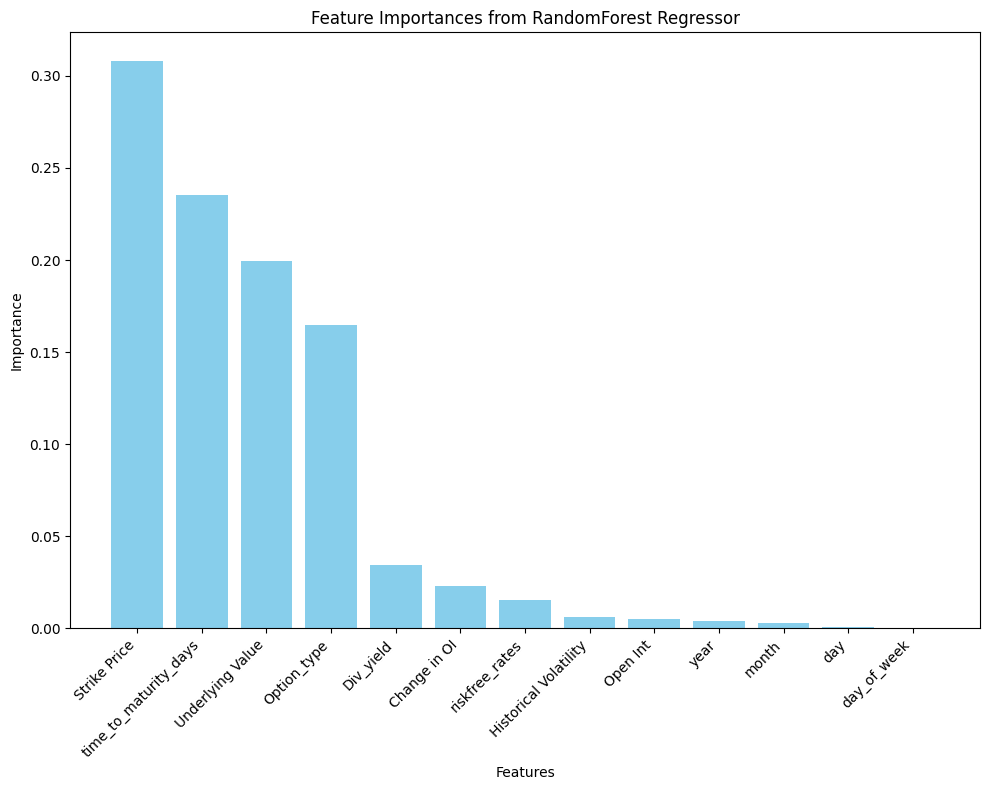

In [18]:
# import matplotlib.pyplot as plt

# # Assuming `rf_regressor` is your trained RandomForestRegressor model
# importances = model.feature_importances_

# # If you have the names of the features stored in a list called `feature_names`
# feature_names = X_train.columns

# # Sorting the features by importance
# indices = np.argsort(importances)[::-1]
# sorted_feature_names = [feature_names[i] for i in indices]
# sorted_importances = importances[indices]

# # Creating a bar plot
# plt.figure(figsize=(10, 8))
# plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Feature Importances from RandomForest Regressor')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# # Show the plot
# plt.show()


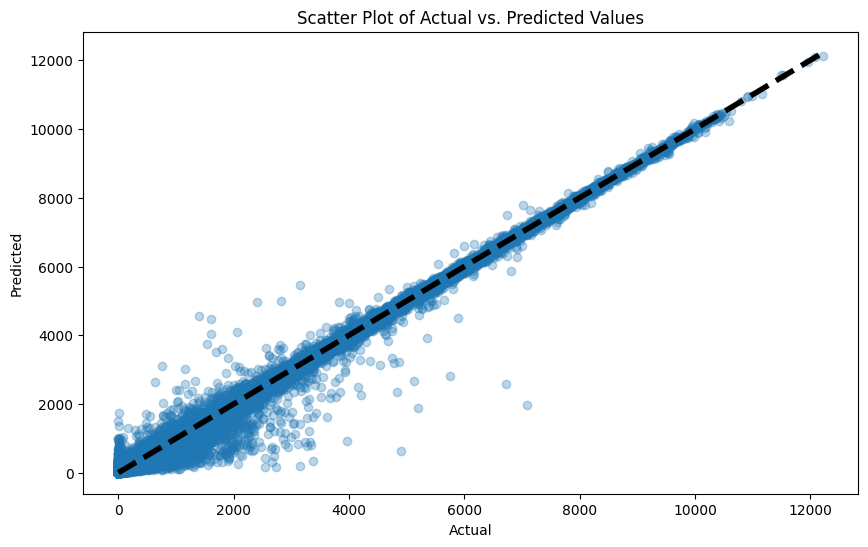

In [19]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Scatter Plot of Actual vs. Predicted Values')
# plt.show()


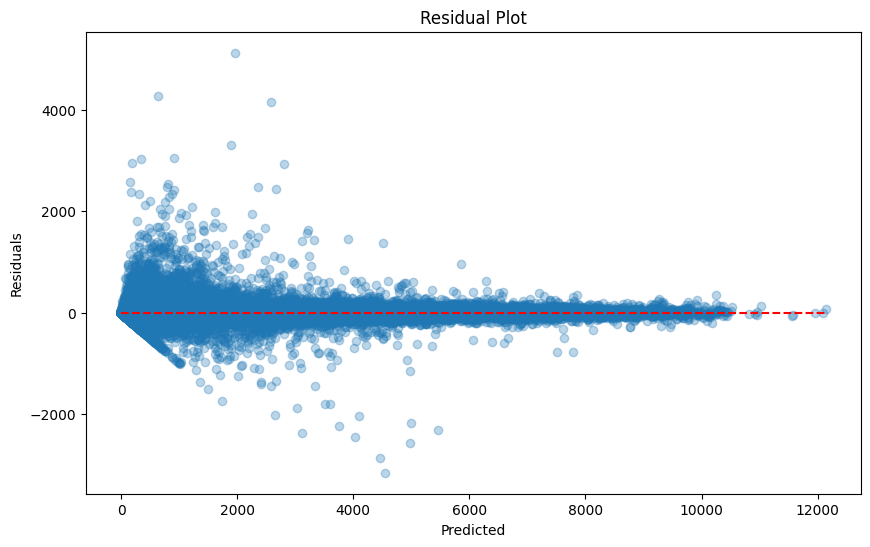

In [20]:
# residuals = y_test - y_pred

# plt.figure(figsize=(10, 6))
# plt.scatter(y_pred, residuals, alpha=0.3)
# plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
# plt.xlabel('Predicted')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.5s finished


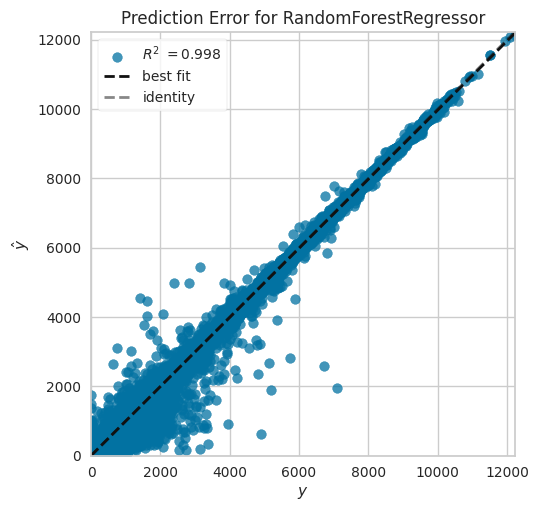

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
# from yellowbrick.regressor import PredictionError

# # Visualize the prediction errors
# visualizer = PredictionError(model)
# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()


In [23]:
# import pickle
# from sklearn.ensemble import RandomForestRegressor

# # Assuming 'model' is your trained RandomForestRegressor
# with open('random_forest_model.pkl', 'wb') as file:
#     pickle.dump(model, file)


In [ ]:
# # Load the model
# with open('random_forest_model.pkl', 'rb') as file:
#     loaded_rf_model = pickle.load(file)


In [18]:
model = RandomForestRegressor(n_estimators=100, max_depth= None, random_state=42, n_jobs=-1, verbose = 3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.5s finished


In [19]:
X_train.columns

Index(['Option_type', 'Strike Price', 'Open Int', 'Change in OI',
       'Underlying Value', 'time_to_maturity_days', 'riskfree_rates',
       'Div_yield', 'Historical Volatility', 'Implied_Volatility', 'year',
       'month', 'day', 'day_of_week'],
      dtype='object')

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 20.12832534074018
Root Mean Squared Error (RMSE): 56.50362308942099


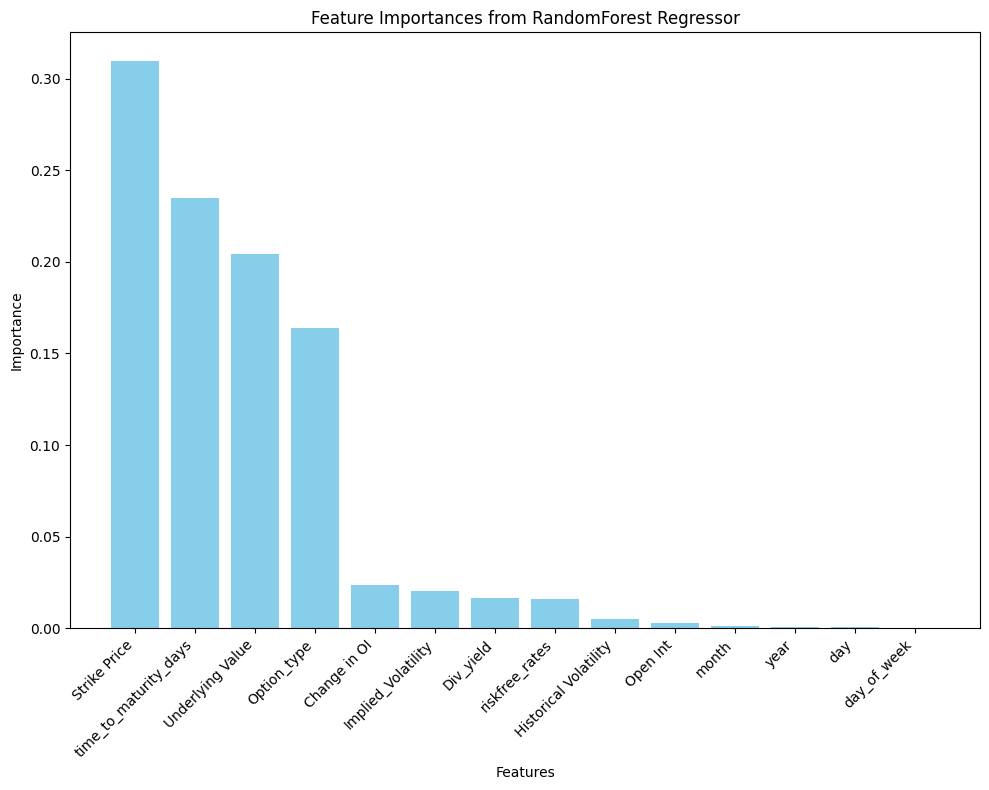

In [21]:
import matplotlib.pyplot as plt

# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = model.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Regressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# Show the plot
plt.show()


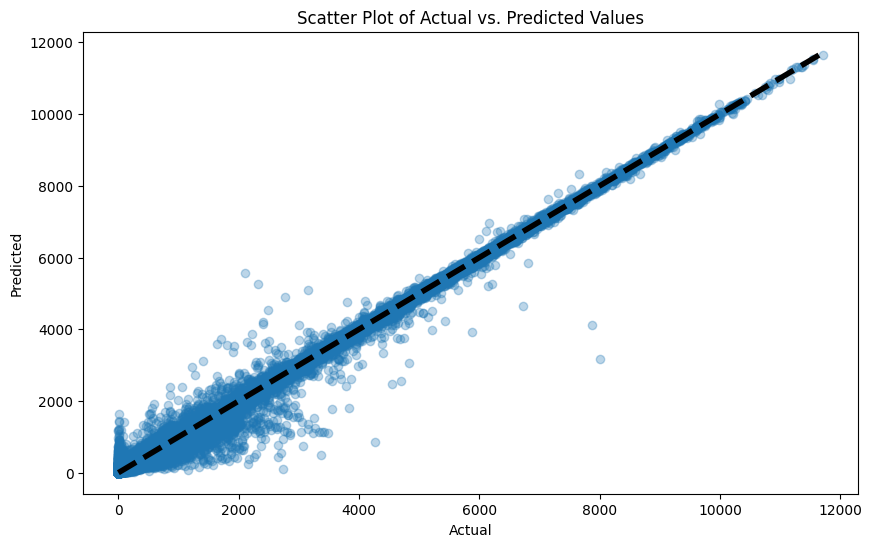

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()


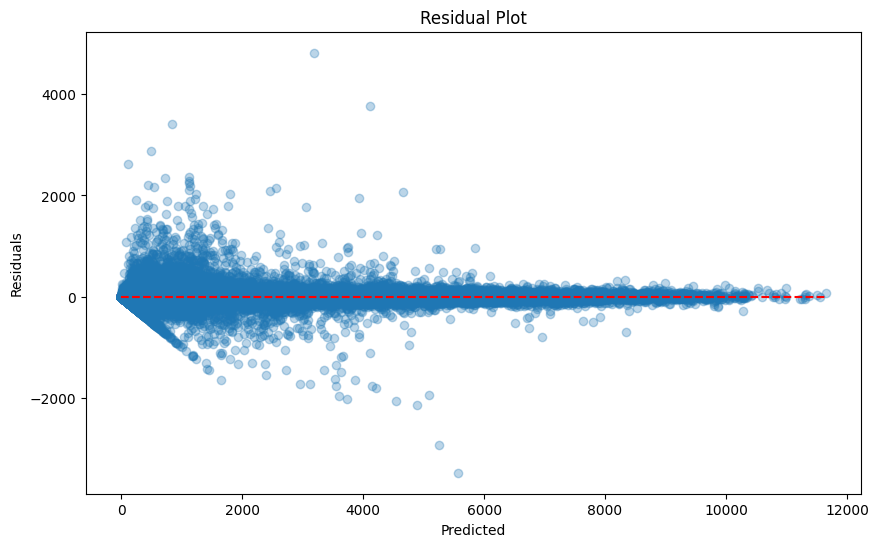

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.5s finished


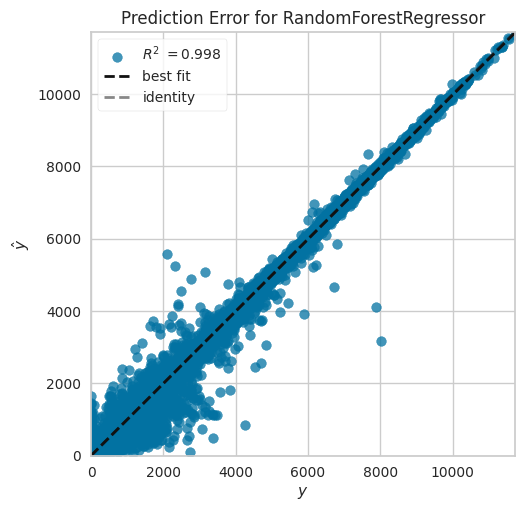

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
from yellowbrick.regressor import PredictionError

# Visualize the prediction errors
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


In [24]:
model = RandomForestRegressor(n_estimators=100, max_depth= None, random_state=42, n_jobs=-1, verbose = 3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.8min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.9s finished


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 20.368030938148937
Root Mean Squared Error (RMSE): 57.847692508710445


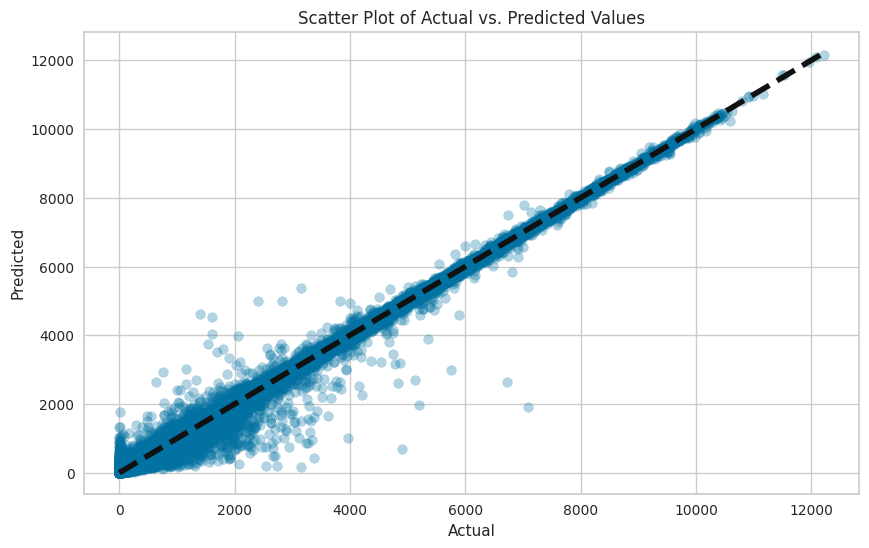

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()


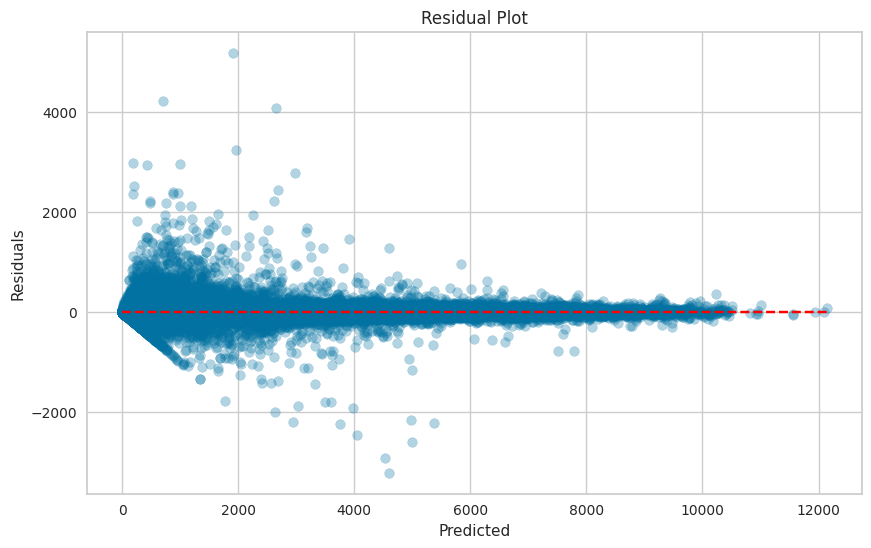

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.1s finished


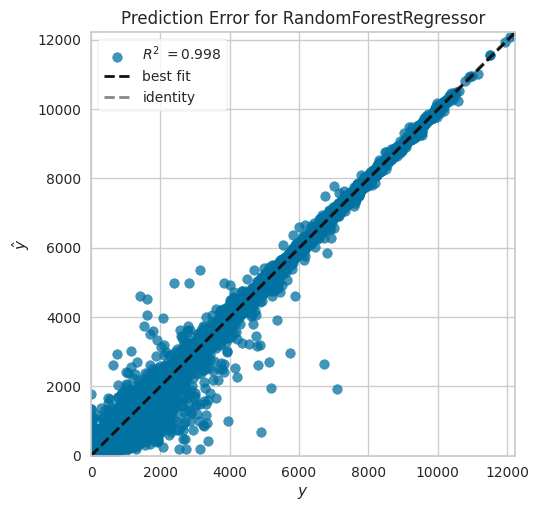

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [29]:
from yellowbrick.regressor import PredictionError

# Visualize the prediction errors
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


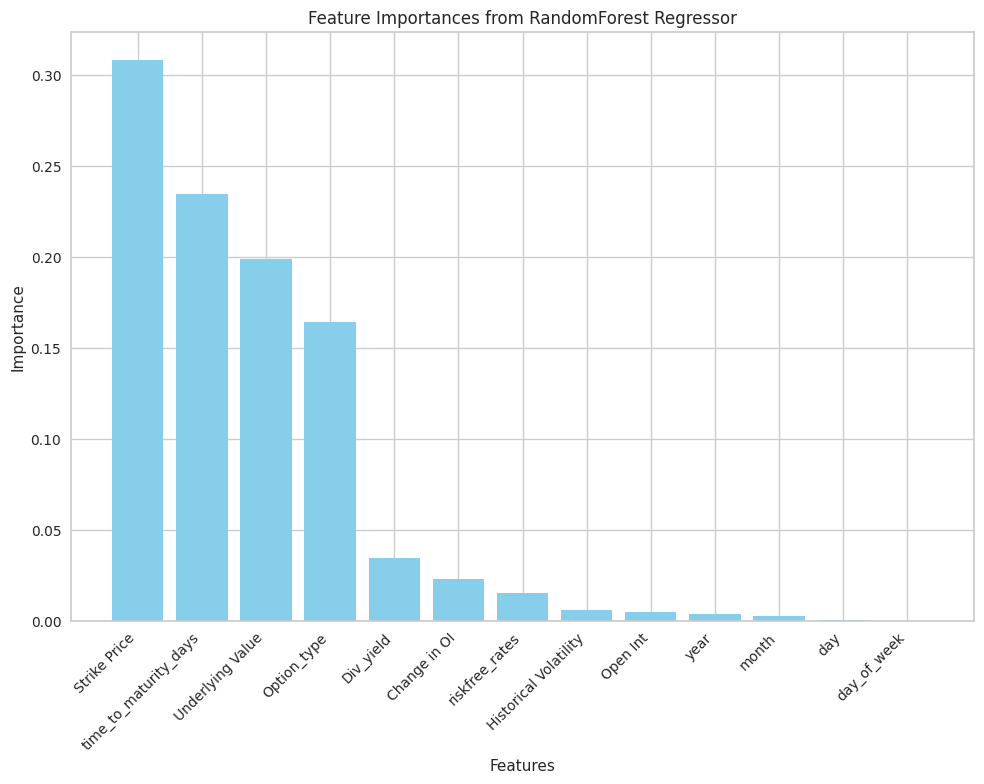

In [26]:
import matplotlib.pyplot as plt

# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = model.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Regressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# Show the plot
plt.show()


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [37]:
# rf_regressor = RandomForestRegressor(random_state=42)

# # Define the hyperparameters and their ranges for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


In [50]:
from sklearn.metrics import mean_absolute_error

# Get the best Random Forest model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Make predictions on the test set using the best model
test_predictions = best_rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae_test = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Set:", mae_test)

MAE on Test Set: 21.782765060149764


In [ ]:
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)

print("MAE on Test Data:", mae)
print("MSE on Test Data:", mse)


MAE on Test Data: 18.98825851309506
MSE on Test Data: 3044.6372622007902


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)

print("MAE on Test Data:", mae)
print("MSE on Test Data:", mse)


MAE on Test Data: 18.94467258103076
MSE on Test Data: 3034.28038831949


In [ ]:
import shap

# Fit the explainer
explainer = shap.TreeExplainer(rf_regressor)

# Assuming `X` is your dataset used for training/testing
shap_values = explainer.shap_values(X)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X, feature_names=X_train1.columns )


In [17]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming `rf_regressor` is your trained RandomForestRegressor model and X is your feature data
features = ['Feature1', 'Feature2', 'Feature3']  # Replace with your actual feature names or indices

fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(rf_regressor, X, features, ax=ax, grid_resolution=20)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust subplots to give room for the title
plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/opt/conda/lib/python3.10/site-packages/sklearn/inspection/__init__.py)

In [14]:
# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = rf_regressor.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train1.columns

# Pairing feature names with their importance scores
importance_dict = dict(zip(feature_names, importances))

# Sorting features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the feature importances
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Strike Price: 0.3093300731461928
time_to_maturity_days: 0.23467343418603412
Underlying Value: 0.2003616337384932
Option_type: 0.16407726516205529
Div_yield: 0.03302202981577543
Change in OI: 0.023260212022580037
riskfree_rates: 0.016303123769540004
Historical Volatility: 0.00591586626314734
Open Int: 0.005124398006823475
year: 0.0039036374586627785
month: 0.0031804375689577233
day: 0.0007143789241069099
day_of_week: 0.0001335099376310287


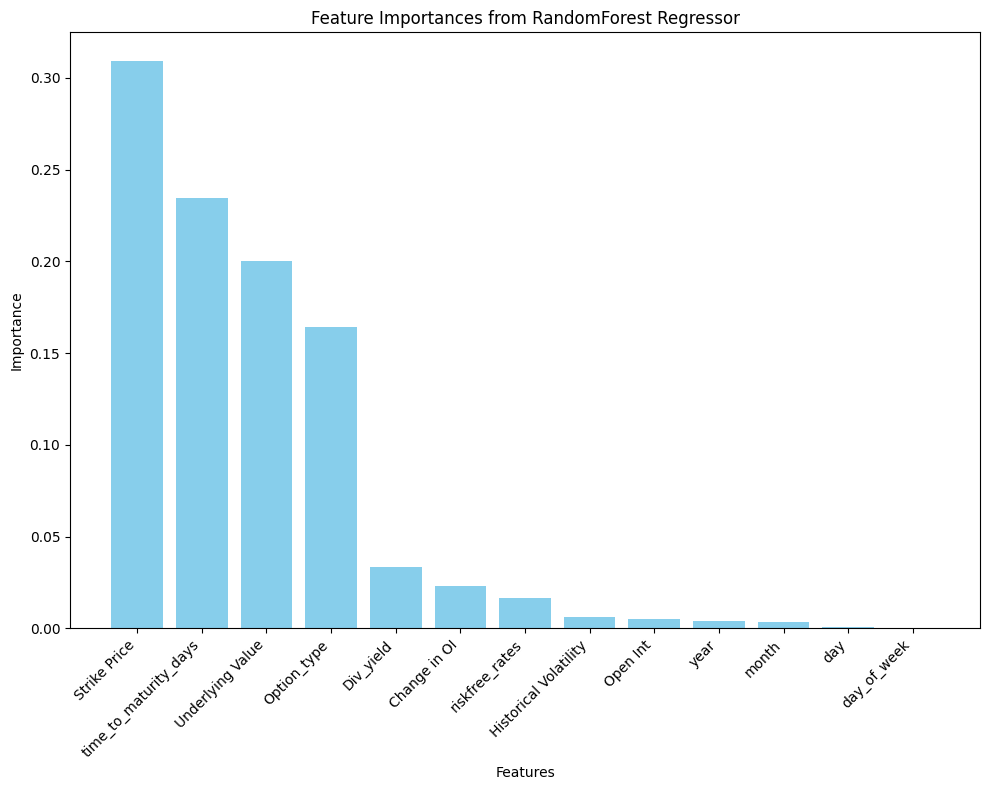

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = rf_regressor.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train1.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Regressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# Show the plot
plt.show()


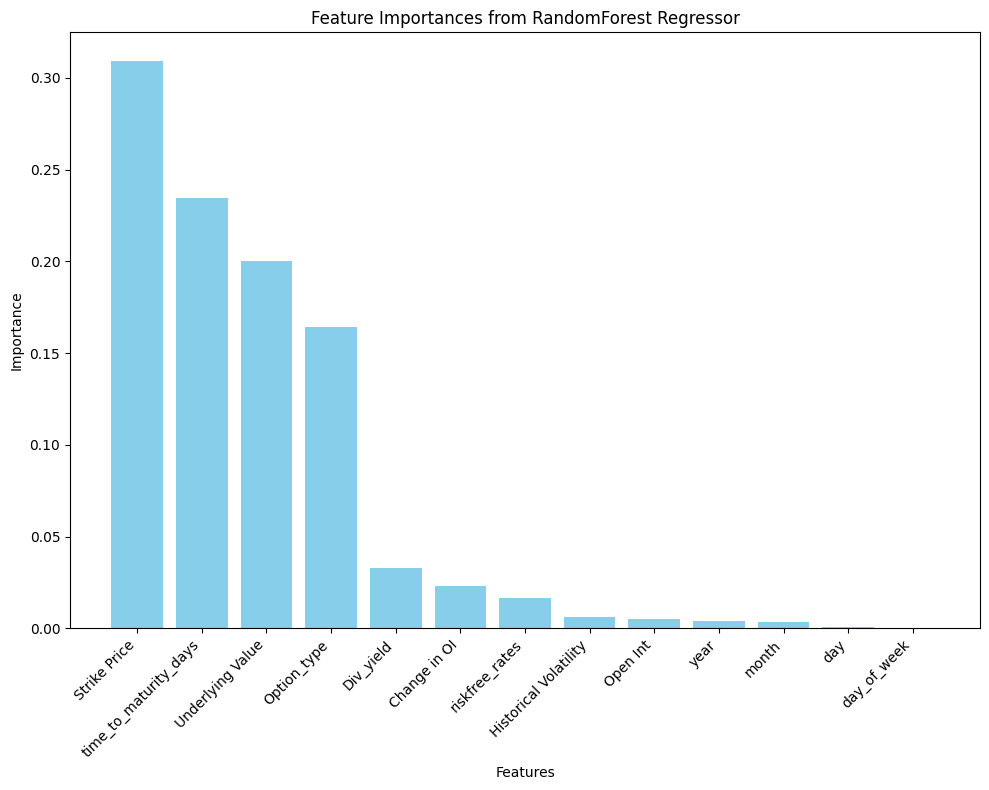

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = rf_regressor.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train1.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Regressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# Show the plot
plt.show()


In [ ]:
rf_regressor = RandomForestRegressor(
    n_estimators=180,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,  # Optional: Set a random state for reproducibility
    n_jobs=-1,
    verbose=2,
    
)

# Fit the Random Forest model on the training data
rf_regressor.fit(X_train1, y_train1)

# Make predictions on the test set
test_predictions = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae_test = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Set:", mae_test)

In [ ]:
from joblib import dump

# Save the model to a file
dump(rf_regressor, 'rf_regressor.joblib')


In [51]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42  # Optional: Set a random state for reproducibility
)

# Fit the Random Forest model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae_test = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Set:", mae_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE on Test Set: 21.782765060149764


In [44]:
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1, n_jobs=-1)

# Perform the Randomized Search to find the best hyperparameters
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [48]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [45]:
best_rf_model = random_search.best_estimator_

In [46]:
best_rf_model

RandomForestRegressor(random_state=42)

In [47]:
val_predictions = best_rf_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print("Mean Squared Error on Validation Set:", val_mse)

# 3. Optional: Fine-tune Hyperparameters (if needed)

# 4. Final Evaluation on Test Set
test_predictions = best_rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error on Test Set:", test_mse)

Mean Squared Error on Validation Set: 3593.159488429023
Mean Squared Error on Test Set: 3772.561637445329


In [ ]:
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1, random_state=42)

# Perform the Randomized Search to find the best hyperparameters
random_search.fit(X_train, y_train)


In [ ]:
# Define the k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the GridSearchCV with the regressor, parameter grid, scoring, and cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1)

# Perform the Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the validation set and calculate MSE
y_val_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)

print("Best Hyperparameters:", best_params)
print("Validation MSE:", mse)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1, verbose=2))
])


In [11]:
param_grid = {
    'rf__n_estimators': [160, 180, 200],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 4],
    'rf__min_samples_leaf': [1, 2]
}

In [12]:
from sklearn.model_selection import GridSearchCV

# Configure GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=3)


In [ ]:
grid_search.fit(X_train, y_train)


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set
test_predictions = best_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Set:", mae_test)

# Optionally, save the best model using joblib
from joblib import dump
dump(best_model, 'best_rf_model.joblib')


In [12]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler

def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Training the model
    model.fit(X_train, y_train)

    # Evaluating the model
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    # Report intermediate results
    trial.report(mse, step=0)

    # Handle pruning based on the intermediate value
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return mse

def main():
    # Setup study with a median pruner and a progress bar
    sampler = TPESampler(seed=42)  # Ensures reproducibility
    study = optuna.create_study(direction='minimize', sampler=sampler, pruner=optuna.pruners.MedianPruner())
    optuna.logging.get_logger("optuna").addHandler(optuna.logging.StreamHandler())
    optuna.logging.set_verbosity(optuna.logging.INFO)

    # Callback for progress output
    def print_progress(study, trial):
        print(f"Finished trial {trial.number} with RMSE: {trial.value:.4f}. Best so far: {study.best_trial.value:.4f}")

    # Execute an optimization with progress and early stopping
    study.optimize(objective, n_trials=100, n_jobs=-1, callbacks=[print_progress], show_progress_bar=True)  # 1 hour timeout as an example

    # Output the best hyperparameters
    print("Best hyperparameters:", study.best_params)
    print("Best RMSE:", study.best_value)

    # Retrain the final model on full training data with best parameters
    best_model = RandomForestRegressor(**study.best_params, random_state=42)
    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Test RMSE:", test_rmse)

if __name__ == "__main__":
    main()


[I 2024-04-28 04:57:18,692] A new study created in memory with name: no-name-f956cdc5-60ae-4081-8851-59b04af969c9


AttributeError: module 'optuna.logging' has no attribute 'StreamHandler'

In [10]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler

def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        #n_jobs=-1,
        verbose = 1,
        n_jobs = -1
    )

    # Training the model
    model.fit(X_train, y_train)

    # Evaluating the model
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    # Report intermediate results
    trial.report(rmse, step=0)

    # Handle pruning based on the intermediate value
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return rmse

if __name__ == "__main__":
    # Create a study object with a median pruner
    sampler = TPESampler(seed=42)  # Ensures reproducibility
    study = optuna.create_study(direction='minimize', sampler=sampler, pruner=optuna.pruners.MedianPruner())
    
    # Execute an optimization with a progress bar
    study.optimize(objective, n_trials=40, n_jobs=-1, show_progress_bar=True)

    # Output the best hyperparameters
    print("Best hyperparameters:", study.best_params)
    print("Best RMSE:", study.best_value)

    # Optionally, retrain the final model on full training data with best parameters
    best_model = RandomForestRegressor(**study.best_params, random_state=42)
    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Test RMSE:", test_rmse)


[I 2024-04-28 05:43:32,052] A new study created in memory with name: no-name-0a04b600-e40a-47bf-9b18-753aff2ed375


  0%|          | 0/40 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 15.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 17.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 17.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 18.2min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 62.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   39.2s


[I 2024-04-28 06:49:13,935] Trial 0 finished with value: 97.18666668692987 and parameters: {'n_estimators': 209, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 0 with value: 97.18666668692987.


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 68.3min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 69.8min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 73.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 17.7min

KeyboardInterrupt



In [11]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler

def objective(trial):
    # Use a smaller subset of data for faster iteration
    sub_sample_index = np.random.choice(X_train.index, size=int(len(X_train) * 0.25), replace=False)
    X_train_sub = X_train.loc[sub_sample_index]
    y_train_sub = y_train.loc[sub_sample_index]

    # Reduced hyperparameter search space
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     max_depth = trial.suggest_int('max_depth', 5, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 10, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 15)

    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        verbose=3
    )
    model.fit(X_train_sub, y_train_sub)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    trial.report(mse, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return mse

if __name__ == "__main__":
    sampler = TPESampler(seed=42)
    study = optuna.create_study(direction='minimize', sampler=sampler, pruner=optuna.pruners.MedianPruner())
    study.optimize(objective, n_trials=30, n_jobs=-1, show_progress_bar=True)
    print("Best hyperparameters:", study.best_params)
    print("Best RMSE:", study.best_value)

    # Retrain on full data with best hyperparameters found
    best_model = RandomForestRegressor(**study.best_params, random_state=42)
    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("Test RMSE:", test_rmse)


[I 2024-04-28 08:08:36,161] A new study created in memory with name: no-name-e9d4307b-47dd-485f-bf6b-38602e470d80


  0%|          | 0/30 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 213
building tree 1 of 217
building tree 2 of 213
building tree 2 of 217
building tree 3 of 213
building tree 4 of 213
building tree 1 of 104
building tree 2 of 104
building tree 3 of 104
building tree 4 of 104
building tree 3 of 217
building tree 4 of 217
building tree 1 of 210
building tree 2 of 210
building tree 3 of 210
building tree 4 of 210
building tree 5 of 217
building tree 6 of 217
building tree 7 of 217
building tree 8 of 217
building tree 5 of 213
building tree 5 of 104
building tree 6 of 104
building tree 7 of 104
building tree 5 of 210
building tree 6 of 210
building tree 7 of 210
building tree 6 of 213
building tree 8 of 104
building tree 7 of 213
building tree 8 of 210
building tree 8 of 213
building tree 9 of 217
building tree 10 of 217
building tree 11 of 217
building tree 12 of 217
building tree 9 of 210
building tree 9 of 104
building tree 10 of 104
building tree 10 of 210
building tree 11 of 210
building tree 11 of 104
building tree 12 of 104
bui

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min


building tree 25 of 210
building tree 26 of 210
building tree 25 of 104
building tree 27 of 210
building tree 26 of 104
building tree 27 of 104
building tree 28 of 104
building tree 25 of 213


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min


building tree 26 of 213
building tree 29 of 217
building tree 27 of 213
building tree 28 of 213
building tree 30 of 217


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min


building tree 31 of 217
building tree 32 of 217
building tree 28 of 210


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min


building tree 29 of 104
building tree 29 of 210
building tree 30 of 210
building tree 30 of 104
building tree 31 of 210
building tree 33 of 217
building tree 34 of 217
building tree 31 of 104
building tree 35 of 217
building tree 36 of 217
building tree 29 of 213
building tree 32 of 104
building tree 30 of 213
building tree 31 of 213
building tree 32 of 213
building tree 32 of 210
building tree 33 of 104
building tree 37 of 217
building tree 38 of 217
building tree 33 of 210
building tree 34 of 210
building tree 39 of 217
building tree 40 of 217
building tree 34 of 104
building tree 35 of 210
building tree 33 of 213
building tree 35 of 104
building tree 36 of 104
building tree 34 of 213
building tree 35 of 213
building tree 36 of 213
building tree 36 of 210
building tree 41 of 217
building tree 42 of 217
building tree 43 of 217
building tree 44 of 217
building tree 37 of 104
building tree 37 of 210
building tree 38 of 210
building tree 38 of 104
building tree 39 of 210
building tree 39

[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:  7.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 123 of 217
building tree 124 of 217


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.3min


building tree 108 of 210
building tree 109 of 210
building tree 110 of 210


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.4s


building tree 108 of 213
building tree 109 of 213
building tree 125 of 217
building tree 126 of 217
building tree 127 of 217
building tree 110 of 213
building tree 111 of 213
building tree 128 of 217
building tree 111 of 210


[Parallel(n_jobs=4)]: Done 104 out of 104 | elapsed:   17.4s finished


[I 2024-04-28 08:16:14,534] Trial 1 finished with value: 9761.989835688199 and parameters: {'n_estimators': 104, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 1 with value: 9761.989835688199.
building tree 112 of 210
building tree 113 of 210
building tree 114 of 210


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 156
building tree 2 of 156
building tree 3 of 156
building tree 4 of 156
building tree 112 of 213
building tree 129 of 217
building tree 130 of 217
building tree 131 of 217
building tree 5 of 156
building tree 113 of 213
building tree 132 of 217
building tree 114 of 213
building tree 6 of 156
building tree 115 of 213
building tree 7 of 156
building tree 115 of 210
building tree 8 of 156
building tree 116 of 210
building tree 117 of 210
building tree 118 of 210
building tree 9 of 156
building tree 133 of 217
building tree 134 of 217
building tree 135 of 217
building tree 116 of 213
building tree 136 of 217
building tree 10 of 156
building tree 11 of 156
building tree 12 of 156
building tree 117 of 213
building tree 118 of 213
building tree 119 of 213
building tree 119 of 210
building tree 120 of 210
building tree 121 of 210
building tree 122 of 210
building tree 13 of 156
building tree 137 of 217
building tree 138 of 217
building tree 139 of 217
building tree 14 of 15

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.3min


building tree 124 of 210
building tree 125 of 210
building tree 17 of 156
building tree 126 of 210
building tree 18 of 156
building tree 19 of 156building tree 141 of 217

building tree 142 of 217
building tree 143 of 217
building tree 20 of 156
building tree 144 of 217
building tree 124 of 213


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.5min


building tree 125 of 213
building tree 21 of 156
building tree 127 of 210
building tree 126 of 213
building tree 127 of 213
building tree 128 of 210
building tree 22 of 156
building tree 129 of 210
building tree 130 of 210
building tree 23 of 156
building tree 145 of 217
building tree 146 of 217
building tree 147 of 217
building tree 24 of 156
building tree 148 of 217
building tree 25 of 156
building tree 128 of 213
building tree 26 of 156
building tree 129 of 213
building tree 131 of 210
building tree 27 of 156
building tree 130 of 213
building tree 132 of 210
building tree 131 of 213
building tree 28 of 156
building tree 149 of 217
building tree 133 of 210


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min


building tree 150 of 217
building tree 151 of 217
building tree 134 of 210
building tree 152 of 217
building tree 29 of 156
building tree 30 of 156
building tree 31 of 156
building tree 132 of 213
building tree 135 of 210
building tree 133 of 213
building tree 32 of 156
building tree 136 of 210
building tree 153 of 217
building tree 154 of 217
building tree 155 of 217
building tree 134 of 213
building tree 137 of 210
building tree 135 of 213
building tree 156 of 217
building tree 138 of 210
building tree 33 of 156
building tree 34 of 156
building tree 35 of 156
building tree 136 of 213
building tree 36 of 156
building tree 139 of 210
building tree 137 of 213
building tree 157 of 217
building tree 158 of 217
building tree 159 of 217
building tree 140 of 210
building tree 160 of 217
building tree 37 of 156
building tree 138 of 213
building tree 139 of 213
building tree 141 of 210
building tree 142 of 210
building tree 38 of 156
building tree 39 of 156
building tree 40 of 156
building tre

[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed: 13.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 197 of 210


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.6s


building tree 194 of 213
building tree 198 of 210
building tree 109 of 156
building tree 110 of 156
building tree 199 of 210
building tree 111 of 156


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   12.5s


building tree 112 of 156
building tree 200 of 210
building tree 195 of 213
building tree 196 of 213
building tree 201 of 210
building tree 197 of 213
building tree 113 of 156
building tree 198 of 213
building tree 202 of 210
building tree 114 of 156


[Parallel(n_jobs=4)]: Done 217 out of 217 | elapsed:   22.6s finished


[I 2024-04-28 08:22:17,212] Trial 0 finished with value: 13572.372300052366 and parameters: {'n_estimators': 217, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 1 with value: 9761.989835688199.
building tree 115 of 156


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 116 of 156
building tree 1 of 151
building tree 2 of 151
building tree 3 of 151
building tree 4 of 151
building tree 203 of 210
building tree 199 of 213
building tree 204 of 210
building tree 200 of 213
building tree 117 of 156
building tree 205 of 210
building tree 201 of 213
building tree 118 of 156
building tree 119 of 156
building tree 202 of 213
building tree 206 of 210
building tree 120 of 156
building tree 5 of 151
building tree 6 of 151
building tree 207 of 210
building tree 7 of 151
building tree 8 of 151
building tree 121 of 156
building tree 208 of 210
building tree 203 of 213
building tree 122 of 156
building tree 209 of 210
building tree 204 of 213
building tree 123 of 156


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.5min


building tree 124 of 156
building tree 205 of 213
building tree 206 of 213
building tree 210 of 210
building tree 9 of 151
building tree 10 of 151
building tree 125 of 156
building tree 11 of 151
building tree 12 of 151
building tree 126 of 156
building tree 127 of 156
building tree 207 of 213
building tree 128 of 156
building tree 208 of 213
building tree 209 of 213


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 14.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 210 of 213
building tree 129 of 156


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.6s


building tree 13 of 151
building tree 14 of 151
building tree 15 of 151
building tree 130 of 156
building tree 16 of 151
building tree 131 of 156
building tree 132 of 156
building tree 211 of 213
building tree 212 of 213
building tree 133 of 156
building tree 213 of 213


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   17.3s


building tree 134 of 156
building tree 135 of 156
building tree 17 of 151
building tree 136 of 156
building tree 18 of 151
building tree 19 of 151
building tree 20 of 151
building tree 137 of 156


[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:   29.8s finished


[I 2024-04-28 08:23:32,229] Trial 3 finished with value: 9524.2361671531 and parameters: {'n_estimators': 210, 'max_depth': 19, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 3 with value: 9524.2361671531.
building tree 138 of 156
building tree 139 of 156


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 106
building tree 2 of 106
building tree 3 of 106
building tree 4 of 106


[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed: 14.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 140 of 156
building tree 21 of 151
building tree 22 of 151
building tree 23 of 151
building tree 24 of 151


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.1s


building tree 141 of 156
building tree 142 of 156
building tree 5 of 106
building tree 143 of 156
building tree 6 of 106
building tree 7 of 106
building tree 8 of 106
building tree 144 of 156
building tree 25 of 151
building tree 26 of 151
building tree 27 of 151
building tree 145 of 156
building tree 28 of 151


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min


building tree 9 of 106
building tree 10 of 106
building tree 11 of 106
building tree 12 of 106
building tree 146 of 156
building tree 147 of 156


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   26.0s


building tree 148 of 156
building tree 149 of 156
building tree 13 of 106
building tree 14 of 106
building tree 29 of 151
building tree 15 of 106
building tree 30 of 151
building tree 16 of 106
building tree 31 of 151
building tree 32 of 151
building tree 150 of 156
building tree 151 of 156
building tree 152 of 156
building tree 17 of 106
building tree 18 of 106
building tree 153 of 156
building tree 19 of 106
building tree 20 of 106


[Parallel(n_jobs=4)]: Done 213 out of 213 | elapsed:   49.8s finished


[I 2024-04-28 08:24:24,843] Trial 2 finished with value: 8691.310866125072 and parameters: {'n_estimators': 213, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 2 with value: 8691.310866125072.
building tree 154 of 156
building tree 33 of 151
building tree 34 of 151
building tree 155 of 156
building tree 1 of 164
building tree 2 of 164
building tree 3 of 164
building tree 4 of 164


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 35 of 151
building tree 156 of 156
building tree 36 of 151
building tree 21 of 106
building tree 22 of 106
building tree 23 of 106
building tree 24 of 106
building tree 5 of 164
building tree 6 of 164
building tree 7 of 164
building tree 8 of 164


[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:  8.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 37 of 151


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.5s


building tree 38 of 151
building tree 25 of 106
building tree 26 of 106
building tree 39 of 151
building tree 40 of 151
building tree 27 of 106
building tree 28 of 106


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 156 out of 156 | elapsed:    7.8s finished


[I 2024-04-28 08:24:48,429] Trial 4 finished with value: 35723.61225696096 and parameters: {'n_estimators': 156, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 2 with value: 8691.310866125072.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 190
building tree 2 of 190
building tree 3 of 190
building tree 4 of 190
building tree 9 of 164
building tree 10 of 164
building tree 11 of 164
building tree 12 of 164
building tree 29 of 106
building tree 30 of 106
building tree 31 of 106
building tree 41 of 151
building tree 32 of 106
building tree 42 of 151
building tree 43 of 151
building tree 44 of 151
building tree 13 of 164
building tree 14 of 164
building tree 15 of 164
building tree 16 of 164
building tree 5 of 190
building tree 6 of 190
building tree 33 of 106
building tree 7 of 190
building tree 8 of 190
building tree 34 of 106
building tree 35 of 106
building tree 36 of 106
building tree 45 of 151
building tree 46 of 151
building tree 47 of 151
building tree 17 of 164
building tree 48 of 151
building tree 18 of 164
building tree 19 of 164
building tree 20 of 164
building tree 37 of 106
building tree 38 of 106
building tree 39 of 106
building tree 40 of 106
building tree 9 of 190
building tree 10 of 190
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min


building tree 47 of 106
building tree 53 of 151
building tree 48 of 106
building tree 54 of 151
building tree 55 of 151
building tree 56 of 151
building tree 17 of 190
building tree 29 of 164
building tree 49 of 106
building tree 50 of 106
building tree 30 of 164
building tree 51 of 106
building tree 31 of 164
building tree 32 of 164
building tree 18 of 190
building tree 19 of 190
building tree 52 of 106
building tree 20 of 190
building tree 57 of 151
building tree 58 of 151
building tree 59 of 151
building tree 60 of 151
building tree 53 of 106
building tree 54 of 106
building tree 33 of 164
building tree 55 of 106
building tree 34 of 164
building tree 35 of 164
building tree 36 of 164
building tree 56 of 106
building tree 21 of 190
building tree 22 of 190
building tree 23 of 190
building tree 24 of 190
building tree 61 of 151
building tree 57 of 106
building tree 58 of 106
building tree 62 of 151
building tree 63 of 151
building tree 37 of 164
building tree 64 of 151
building tree 59

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 64 of 106
building tree 42 of 164
building tree 66 of 151
building tree 67 of 151
building tree 43 of 164
building tree 44 of 164
building tree 68 of 151
building tree 65 of 106
building tree 66 of 106
building tree 29 of 190
building tree 67 of 106
building tree 45 of 164
building tree 68 of 106
building tree 46 of 164
building tree 30 of 190
building tree 47 of 164
building tree 31 of 190
building tree 48 of 164
building tree 32 of 190
building tree 69 of 151
building tree 70 of 151
building tree 71 of 151
building tree 69 of 106
building tree 70 of 106
building tree 72 of 151
building tree 71 of 106
building tree 49 of 164
building tree 72 of 106
building tree 33 of 190
building tree 50 of 164
building tree 51 of 164
building tree 52 of 164
building tree 73 of 106
building tree 74 of 106
building tree 34 of 190
building tree 73 of 151
building tree 35 of 190
building tree 36 of 190
building tree 74 of 151
building tree 75 of 106
building tree 75 of 151
building tree 53

[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:  5.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 86 of 164
building tree 61 of 190


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 106 out of 106 | elapsed:    4.3s finished


[I 2024-04-28 08:29:04,903] Trial 6 pruned. 
building tree 87 of 164
building tree 88 of 164


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 113
building tree 2 of 113
building tree 3 of 113
building tree 4 of 113
building tree 101 of 151
building tree 102 of 151
building tree 103 of 151
building tree 104 of 151
building tree 89 of 164
building tree 90 of 164
building tree 62 of 190
building tree 63 of 190
building tree 64 of 190
building tree 65 of 190
building tree 91 of 164
building tree 92 of 164
building tree 5 of 113
building tree 6 of 113
building tree 7 of 113
building tree 8 of 113
building tree 105 of 151
building tree 93 of 164
building tree 106 of 151
building tree 94 of 164
building tree 107 of 151
building tree 108 of 151
building tree 95 of 164
building tree 96 of 164
building tree 66 of 190
building tree 67 of 190
building tree 68 of 190
building tree 69 of 190
building tree 97 of 164
building tree 98 of 164
building tree 9 of 113
building tree 109 of 151
building tree 10 of 113
building tree 11 of 113
building tree 12 of 113
building tree 110 of 151
building tree 99 of 164
building tree 1

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.3min


building tree 116 of 164
building tree 82 of 190
building tree 83 of 190
building tree 84 of 190
building tree 117 of 164
building tree 85 of 190
building tree 118 of 164
building tree 125 of 151
building tree 119 of 164
building tree 120 of 164
building tree 126 of 151
building tree 127 of 151
building tree 25 of 113
building tree 26 of 113
building tree 27 of 113
building tree 28 of 113


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 128 of 151
building tree 121 of 164
building tree 122 of 164
building tree 86 of 190
building tree 87 of 190
building tree 88 of 190
building tree 89 of 190
building tree 123 of 164
building tree 124 of 164


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.6min


building tree 129 of 151
building tree 130 of 151
building tree 131 of 151
building tree 29 of 113
building tree 125 of 164
building tree 126 of 164
building tree 30 of 113
building tree 31 of 113
building tree 132 of 151
building tree 32 of 113
building tree 90 of 190
building tree 127 of 164
building tree 128 of 164
building tree 91 of 190
building tree 92 of 190
building tree 93 of 190
building tree 129 of 164
building tree 133 of 151
building tree 130 of 164
building tree 134 of 151
building tree 135 of 151
building tree 33 of 113
building tree 34 of 113
building tree 35 of 113
building tree 136 of 151
building tree 131 of 164
building tree 36 of 113
building tree 132 of 164
building tree 94 of 190
building tree 133 of 164
building tree 134 of 164
building tree 95 of 190
building tree 96 of 190
building tree 97 of 190
building tree 137 of 151
building tree 135 of 164
building tree 138 of 151
building tree 139 of 151
building tree 136 of 164
building tree 37 of 113
building tree 140

[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed: 10.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 157 of 164


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.4s


building tree 158 of 164
building tree 114 of 190
building tree 53 of 113
building tree 54 of 113
building tree 55 of 113
building tree 56 of 113
building tree 159 of 164


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   11.6s


building tree 160 of 164
building tree 161 of 164


[Parallel(n_jobs=4)]: Done 151 out of 151 | elapsed:   14.6s finished


building tree 115 of 190
[I 2024-04-28 08:33:01,698] Trial 5 pruned. 
building tree 162 of 164building tree 116 of 190

building tree 117 of 190


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 252
building tree 2 of 252
building tree 3 of 252
building tree 4 of 252
building tree 118 of 190
building tree 57 of 113
building tree 58 of 113
building tree 59 of 113
building tree 163 of 164
building tree 164 of 164
building tree 60 of 113
building tree 119 of 190
building tree 120 of 190
building tree 121 of 190
building tree 5 of 252
building tree 6 of 252
building tree 122 of 190
building tree 7 of 252
building tree 8 of 252


[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:  9.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 61 of 113


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.3s


building tree 62 of 113
building tree 63 of 113
building tree 64 of 113


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 164 out of 164 | elapsed:    8.1s finished


[I 2024-04-28 08:33:31,695] Trial 7 pruned. 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 232
building tree 2 of 232
building tree 3 of 232
building tree 4 of 232
building tree 123 of 190
building tree 124 of 190


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.7min


building tree 125 of 190
building tree 126 of 190
building tree 9 of 252
building tree 10 of 252
building tree 11 of 252
building tree 12 of 252
building tree 65 of 113
building tree 66 of 113
building tree 67 of 113
building tree 68 of 113
building tree 127 of 190
building tree 128 of 190
building tree 129 of 190
building tree 5 of 232
building tree 130 of 190
building tree 6 of 232
building tree 7 of 232
building tree 8 of 232
building tree 13 of 252
building tree 14 of 252
building tree 15 of 252
building tree 16 of 252
building tree 69 of 113
building tree 70 of 113
building tree 71 of 113
building tree 72 of 113
building tree 131 of 190
building tree 132 of 190
building tree 133 of 190
building tree 134 of 190
building tree 9 of 232
building tree 10 of 232
building tree 11 of 232
building tree 12 of 232
building tree 73 of 113
building tree 17 of 252
building tree 18 of 252
building tree 19 of 252
building tree 20 of 252
building tree 74 of 113
building tree 75 of 113
building tre

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 82 of 113
building tree 83 of 113
building tree 84 of 113
building tree 143 of 190
building tree 144 of 190
building tree 145 of 190
building tree 146 of 190
building tree 85 of 113
building tree 29 of 252
building tree 21 of 232
building tree 22 of 232
building tree 23 of 232
building tree 24 of 232
building tree 30 of 252
building tree 31 of 252
building tree 86 of 113
building tree 32 of 252
building tree 87 of 113
building tree 147 of 190
building tree 88 of 113
building tree 148 of 190
building tree 149 of 190
building tree 150 of 190
building tree 89 of 113
building tree 25 of 232
building tree 33 of 252
building tree 26 of 232
building tree 90 of 113
building tree 91 of 113
building tree 27 of 232
building tree 34 of 252
building tree 28 of 232


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 35 of 252
building tree 151 of 190
building tree 36 of 252
building tree 92 of 113
building tree 152 of 190
building tree 153 of 190
building tree 154 of 190
building tree 93 of 113
building tree 155 of 190
building tree 94 of 113
building tree 95 of 113
building tree 37 of 252
building tree 29 of 232
building tree 30 of 232
building tree 38 of 252
building tree 31 of 232
building tree 32 of 232
building tree 39 of 252
building tree 96 of 113
building tree 40 of 252
building tree 156 of 190
building tree 157 of 190
building tree 158 of 190
building tree 97 of 113
building tree 159 of 190
building tree 98 of 113
building tree 99 of 113
building tree 41 of 252
building tree 33 of 232
building tree 34 of 232
building tree 100 of 113
building tree 42 of 252
building tree 35 of 232
building tree 36 of 232
building tree 43 of 252
building tree 44 of 252
building tree 160 of 190
building tree 161 of 190
building tree 162 of 190
building tree 101 of 113
building tree 163 of 190
b

[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:  8.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 51 of 232
building tree 52 of 232
building tree 179 of 190


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.7s


building tree 180 of 190
building tree 61 of 252
building tree 62 of 252
building tree 181 of 190
building tree 182 of 190
building tree 63 of 252
building tree 53 of 232
building tree 64 of 252
building tree 54 of 232
building tree 55 of 232
building tree 183 of 190


[Parallel(n_jobs=4)]: Done 113 out of 113 | elapsed:   21.1s finished


building tree 56 of 232
[I 2024-04-28 08:37:40,400] Trial 9 finished with value: 9008.433220403973 and parameters: {'n_estimators': 113, 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 2 with value: 8691.310866125072.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 243building tree 2 of 243
building tree 3 of 243

building tree 4 of 243
building tree 184 of 190
building tree 185 of 190
building tree 186 of 190
building tree 65 of 252
building tree 66 of 252
building tree 5 of 243
building tree 67 of 252
building tree 68 of 252
building tree 57 of 232
building tree 58 of 232
building tree 6 of 243
building tree 7 of 243
building tree 187 of 190
building tree 8 of 243
building tree 59 of 232
building tree 60 of 232
building tree 188 of 190
building tree 189 of 190
building tree 9 of 243
building tree 190 of 190
building tree 10 of 243
building tree 69 of 252
building tree 70 of 252
building tree 11 of 243
building tree 12 of 243
building tree 71 of 252
building tree 72 of 252
building tree 61 of 232
building tree 62 of 232
building tree 63 of 232
building tree 64 of 232
building tree 13 of 243
building tree 14 of 243
building tree 15 of 243
building tree 16 of 243


[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed: 13.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 73 of 252
building tree 74 of 252


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.7s


building tree 75 of 252
building tree 65 of 232
building tree 76 of 252
building tree 66 of 232
building tree 67 of 232
building tree 68 of 232
building tree 17 of 243
building tree 18 of 243
building tree 19 of 243
building tree 20 of 243


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   18.2s


building tree 77 of 252
building tree 78 of 252
building tree 79 of 252
building tree 80 of 252
building tree 69 of 232
building tree 21 of 243
building tree 22 of 243
building tree 23 of 243
building tree 24 of 243
building tree 70 of 232
building tree 71 of 232


[Parallel(n_jobs=4)]: Done 190 out of 190 | elapsed:   28.9s finished


[I 2024-04-28 08:38:55,071] Trial 8 pruned. 
building tree 72 of 232


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 281
building tree 2 of 281
building tree 3 of 281
building tree 4 of 281
building tree 81 of 252
building tree 25 of 243
building tree 82 of 252
building tree 26 of 243
building tree 27 of 243
building tree 28 of 243


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min


building tree 83 of 252
building tree 84 of 252
building tree 73 of 232
building tree 74 of 232
building tree 75 of 232
building tree 76 of 232
building tree 5 of 281
building tree 6 of 281
building tree 7 of 281
building tree 8 of 281
building tree 29 of 243
building tree 30 of 243
building tree 31 of 243
building tree 32 of 243
building tree 85 of 252
building tree 86 of 252
building tree 87 of 252
building tree 88 of 252
building tree 77 of 232
building tree 78 of 232
building tree 79 of 232
building tree 33 of 243
building tree 9 of 281
building tree 80 of 232
building tree 34 of 243
building tree 10 of 281
building tree 35 of 243
building tree 11 of 281
building tree 12 of 281
building tree 36 of 243
building tree 89 of 252
building tree 90 of 252
building tree 91 of 252
building tree 37 of 243
building tree 92 of 252
building tree 38 of 243
building tree 81 of 232
building tree 39 of 243
building tree 40 of 243
building tree 82 of 232
building tree 83 of 232
building tree 13 of 2

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 96 of 232
building tree 105 of 252
building tree 106 of 252
building tree 57 of 243
building tree 58 of 243
building tree 107 of 252
building tree 59 of 243
building tree 60 of 243
building tree 108 of 252
building tree 29 of 281
building tree 97 of 232
building tree 30 of 281
building tree 98 of 232
building tree 31 of 281
building tree 99 of 232
building tree 32 of 281
building tree 100 of 232
building tree 109 of 252
building tree 61 of 243
building tree 62 of 243
building tree 63 of 243
building tree 64 of 243
building tree 110 of 252
building tree 111 of 252
building tree 112 of 252
building tree 33 of 281
building tree 34 of 281
building tree 101 of 232
building tree 35 of 281
building tree 102 of 232
building tree 103 of 232
building tree 36 of 281
building tree 65 of 243
building tree 66 of 243
building tree 67 of 243
building tree 68 of 243
building tree 104 of 232
building tree 113 of 252
building tree 114 of 252
building tree 115 of 252
building tree 37 of 281


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.2min


building tree 46 of 281
building tree 47 of 281
building tree 113 of 232
building tree 48 of 281
building tree 114 of 232
building tree 115 of 232
building tree 81 of 243
building tree 82 of 243
building tree 83 of 243
building tree 84 of 243
building tree 125 of 252
building tree 116 of 232
building tree 126 of 252
building tree 127 of 252
building tree 49 of 281
building tree 50 of 281
building tree 128 of 252
building tree 51 of 281
building tree 117 of 232
building tree 85 of 243
building tree 86 of 243
building tree 87 of 243
building tree 52 of 281
building tree 88 of 243
building tree 118 of 232
building tree 119 of 232
building tree 129 of 252
building tree 120 of 232
building tree 130 of 252
building tree 131 of 252
building tree 53 of 281
building tree 89 of 243
building tree 90 of 243
building tree 91 of 243
building tree 92 of 243
building tree 54 of 281
building tree 55 of 281
building tree 132 of 252
building tree 121 of 232
building tree 56 of 281
building tree 122 of 23

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.5min


building tree 93 of 243
building tree 94 of 243
building tree 95 of 243
building tree 134 of 252
building tree 96 of 243
building tree 135 of 252
building tree 57 of 281
building tree 58 of 281
building tree 59 of 281
building tree 136 of 252
building tree 125 of 232
building tree 60 of 281
building tree 97 of 243
building tree 137 of 252
building tree 126 of 232
building tree 127 of 232
building tree 98 of 243
building tree 99 of 243
building tree 100 of 243
building tree 128 of 232
building tree 138 of 252
building tree 61 of 281
building tree 139 of 252
building tree 62 of 281
building tree 63 of 281
building tree 140 of 252
building tree 64 of 281
building tree 129 of 232
building tree 101 of 243
building tree 102 of 243
building tree 103 of 243
building tree 104 of 243
building tree 141 of 252
building tree 130 of 232
building tree 131 of 232
building tree 132 of 232
building tree 142 of 252
building tree 65 of 281
building tree 143 of 252
building tree 105 of 243
building tree 66

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.1min


building tree 145 of 232
building tree 157 of 252
building tree 146 of 232
building tree 147 of 232
building tree 158 of 252
building tree 125 of 243
building tree 81 of 281
building tree 148 of 232
building tree 126 of 243
building tree 127 of 243
building tree 159 of 252
building tree 82 of 281
building tree 83 of 281
building tree 128 of 243
building tree 160 of 252
building tree 84 of 281
building tree 149 of 232
building tree 161 of 252
building tree 129 of 243
building tree 130 of 243
building tree 150 of 232
building tree 131 of 243
building tree 151 of 232
building tree 162 of 252
building tree 85 of 281
building tree 132 of 243
building tree 152 of 232
building tree 163 of 252
building tree 86 of 281
building tree 87 of 281
building tree 164 of 252
building tree 88 of 281
building tree 133 of 243
building tree 134 of 243
building tree 165 of 252
building tree 153 of 232
building tree 135 of 243
building tree 154 of 232
building tree 136 of 243
building tree 155 of 232
building

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.2min


building tree 201 of 252
building tree 180 of 243
building tree 125 of 281
building tree 189 of 232
building tree 181 of 243
building tree 182 of 243
building tree 183 of 243
building tree 202 of 252
building tree 126 of 281
building tree 190 of 232
building tree 191 of 232
building tree 184 of 243
building tree 127 of 281
building tree 192 of 232
building tree 203 of 252
building tree 204 of 252
building tree 128 of 281
building tree 205 of 252
building tree 185 of 243
building tree 186 of 243
building tree 187 of 243
building tree 129 of 281
building tree 193 of 232
building tree 206 of 252
building tree 188 of 243
building tree 130 of 281
building tree 131 of 281
building tree 194 of 232
building tree 195 of 232
building tree 196 of 232
building tree 207 of 252
building tree 208 of 252
building tree 132 of 281
building tree 189 of 243
building tree 209 of 252
building tree 190 of 243
building tree 191 of 243
building tree 133 of 281
building tree 197 of 232
building tree 192 of 243


[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed: 18.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 241 of 243
building tree 242 of 243
building tree 173 of 281


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.9s


building tree 243 of 243
building tree 250 of 252
building tree 174 of 281
building tree 175 of 281
building tree 251 of 252
building tree 176 of 281
building tree 252 of 252


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 14.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.6s


building tree 177 of 281


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   23.0s


building tree 178 of 281


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    7.2s


building tree 179 of 281


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed: 19.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 180 of 281


[Parallel(n_jobs=4)]: Done 243 out of 243 | elapsed:   14.0s finished


[I 2024-04-28 08:52:30,386] Trial 12 pruned. 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 290
building tree 2 of 290
building tree 3 of 290
building tree 4 of 290


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.6s


building tree 181 of 281


[Parallel(n_jobs=4)]: Done 232 out of 232 | elapsed:   43.8s finished


[I 2024-04-28 08:52:39,059] Trial 11 finished with value: 8775.914620322228 and parameters: {'n_estimators': 232, 'max_depth': 26, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 2 with value: 8691.310866125072.
building tree 182 of 281


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 284
building tree 2 of 284
building tree 3 of 284
building tree 4 of 284
building tree 183 of 281
building tree 184 of 281
building tree 5 of 290
building tree 6 of 290
building tree 7 of 290
building tree 8 of 290


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   24.9s


building tree 185 of 281
building tree 186 of 281
building tree 5 of 284
building tree 6 of 284
building tree 7 of 284
building tree 8 of 284
building tree 187 of 281
building tree 188 of 281
building tree 9 of 290
building tree 10 of 290
building tree 11 of 290
building tree 12 of 290
building tree 189 of 281
building tree 190 of 281
building tree 9 of 284
building tree 10 of 284
building tree 11 of 284
building tree 12 of 284


[Parallel(n_jobs=4)]: Done 252 out of 252 | elapsed:   53.7s finished


[I 2024-04-28 08:53:23,135] Trial 10 finished with value: 9195.038779221995 and parameters: {'n_estimators': 252, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with value: 8691.310866125072.
building tree 191 of 281
building tree 192 of 281


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 298building tree 2 of 298

building tree 3 of 298
building tree 4 of 298
building tree 13 of 290
building tree 14 of 290
building tree 15 of 290
building tree 16 of 290
building tree 193 of 281
building tree 194 of 281
building tree 13 of 284building tree 14 of 284

building tree 15 of 284
building tree 16 of 284
building tree 195 of 281
building tree 196 of 281
building tree 5 of 298
building tree 6 of 298building tree 7 of 298

building tree 8 of 298
building tree 17 of 290
building tree 18 of 290
building tree 19 of 290
building tree 20 of 290
building tree 197 of 281
building tree 198 of 281
building tree 17 of 284
building tree 18 of 284
building tree 19 of 284
building tree 20 of 284
building tree 199 of 281
building tree 200 of 281
building tree 9 of 298
building tree 10 of 298
building tree 11 of 298
building tree 12 of 298
building tree 21 of 290
building tree 22 of 290
building tree 23 of 290
building tree 24 of 290
building tree 201 of 281
building tree 20

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 205 of 281
building tree 206 of 281
building tree 25 of 284
building tree 26 of 284
building tree 27 of 284
building tree 28 of 284


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 207 of 281
building tree 17 of 298
building tree 208 of 281
building tree 18 of 298
building tree 19 of 298
building tree 20 of 298
building tree 29 of 290
building tree 30 of 290
building tree 31 of 290
building tree 209 of 281
building tree 210 of 281
building tree 32 of 290
building tree 29 of 284
building tree 30 of 284
building tree 31 of 284
building tree 32 of 284
building tree 211 of 281
building tree 21 of 298
building tree 212 of 281
building tree 22 of 298
building tree 23 of 298
building tree 24 of 298
building tree 33 of 290
building tree 34 of 290
building tree 35 of 290
building tree 213 of 281
building tree 36 of 290
building tree 214 of 281
building tree 33 of 284
building tree 34 of 284
building tree 35 of 284
building tree 36 of 284
building tree 215 of 281
building tree 25 of 298
building tree 26 of 298
building tree 27 of 298
building tree 28 of 298
building tree 216 of 281


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 37 of 290
building tree 38 of 290
building tree 39 of 290
building tree 217 of 281
building tree 40 of 290
building tree 218 of 281
building tree 37 of 284
building tree 38 of 284
building tree 39 of 284
building tree 40 of 284
building tree 219 of 281
building tree 29 of 298
building tree 30 of 298
building tree 31 of 298
building tree 220 of 281
building tree 32 of 298
building tree 41 of 290
building tree 42 of 290
building tree 43 of 290
building tree 221 of 281
building tree 44 of 290
building tree 222 of 281
building tree 41 of 284
building tree 42 of 284
building tree 43 of 284
building tree 44 of 284
building tree 223 of 281
building tree 33 of 298
building tree 34 of 298
building tree 224 of 281
building tree 35 of 298
building tree 36 of 298
building tree 45 of 290
building tree 225 of 281
building tree 46 of 290
building tree 47 of 290
building tree 226 of 281
building tree 48 of 290
building tree 45 of 284
building tree 46 of 284
building tree 47 of 284
buildi

[Parallel(n_jobs=-1)]: Done 281 out of 281 | elapsed: 21.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 101 of 290
building tree 102 of 290
building tree 104 of 284
building tree 103 of 290
building tree 104 of 290


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.4s


building tree 99 of 298
building tree 105 of 284
building tree 100 of 298
building tree 101 of 298
building tree 106 of 284
building tree 102 of 298
building tree 107 of 284
building tree 105 of 290
building tree 106 of 290
building tree 108 of 284
building tree 107 of 290
building tree 103 of 298
building tree 108 of 290


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   29.8s


building tree 109 of 284
building tree 104 of 298
building tree 105 of 298
building tree 110 of 284
building tree 106 of 298
building tree 111 of 284
building tree 109 of 290
building tree 110 of 290
building tree 107 of 298
building tree 112 of 284
building tree 111 of 290
building tree 112 of 290
building tree 113 of 284
building tree 108 of 298
building tree 109 of 298
building tree 114 of 284
building tree 110 of 298
building tree 115 of 284
building tree 113 of 290
building tree 111 of 298
building tree 114 of 290
building tree 116 of 284
building tree 115 of 290
building tree 116 of 290
building tree 112 of 298
building tree 117 of 284
building tree 113 of 298


[Parallel(n_jobs=4)]: Done 281 out of 281 | elapsed:  1.2min finished


[I 2024-04-28 09:01:45,759] Trial 13 finished with value: 8255.146484471428 and parameters: {'n_estimators': 281, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 13 with value: 8255.146484471428.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 277building tree 2 of 277
building tree 3 of 277
building tree 4 of 277

building tree 118 of 284
building tree 114 of 298
building tree 119 of 284
building tree 115 of 298
building tree 117 of 290
building tree 118 of 290
building tree 120 of 284
building tree 119 of 290
building tree 120 of 290
building tree 116 of 298
building tree 117 of 298
building tree 121 of 284
building tree 5 of 277
building tree 6 of 277
building tree 7 of 277
building tree 8 of 277
building tree 118 of 298
building tree 122 of 284
building tree 123 of 284
building tree 119 of 298
building tree 121 of 290
building tree 122 of 290
building tree 124 of 284


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.5min


building tree 123 of 290
building tree 120 of 298
building tree 121 of 298
building tree 124 of 290


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.8min


building tree 125 of 284
building tree 9 of 277
building tree 10 of 277
building tree 11 of 277
building tree 12 of 277
building tree 122 of 298
building tree 126 of 284
building tree 127 of 284
building tree 123 of 298
building tree 125 of 290
building tree 126 of 290
building tree 128 of 284
building tree 124 of 298


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.1min


building tree 125 of 298
building tree 127 of 290
building tree 13 of 277
building tree 128 of 290
building tree 14 of 277
building tree 129 of 284
building tree 15 of 277
building tree 16 of 277
building tree 126 of 298
building tree 127 of 298
building tree 130 of 284
building tree 131 of 284
building tree 129 of 290
building tree 128 of 298
building tree 129 of 298
building tree 132 of 284
building tree 130 of 290
building tree 17 of 277
building tree 18 of 277
building tree 131 of 290
building tree 19 of 277
building tree 132 of 290
building tree 133 of 284
building tree 20 of 277
building tree 130 of 298
building tree 131 of 298
building tree 134 of 284
building tree 135 of 284
building tree 132 of 298
building tree 133 of 298
building tree 21 of 277
building tree 133 of 290
building tree 22 of 277
building tree 136 of 284
building tree 134 of 290
building tree 23 of 277
building tree 135 of 290
building tree 24 of 277
building tree 137 of 284
building tree 136 of 290
building tre

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 141 of 284
building tree 139 of 290
building tree 140 of 290
building tree 138 of 298
building tree 139 of 298
building tree 142 of 284
building tree 143 of 284
building tree 29 of 277
building tree 140 of 298
building tree 141 of 298
building tree 30 of 277
building tree 141 of 290
building tree 31 of 277
building tree 144 of 284
building tree 32 of 277
building tree 142 of 290
building tree 142 of 298
building tree 145 of 284
building tree 143 of 290
building tree 144 of 290
building tree 33 of 277
building tree 143 of 298
building tree 144 of 298
building tree 34 of 277
building tree 145 of 298
building tree 146 of 284
building tree 147 of 284
building tree 35 of 277
building tree 36 of 277
building tree 146 of 298
building tree 145 of 290
building tree 148 of 284
building tree 146 of 290
building tree 149 of 284
building tree 147 of 290
building tree 148 of 290
building tree 37 of 277
building tree 147 of 298
building tree 38 of 277
building tree 148 of 298
building t

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.7min


building tree 124 of 277
building tree 224 of 290
building tree 228 of 284
building tree 232 of 298
building tree 229 of 284
building tree 230 of 284
building tree 125 of 277
building tree 233 of 298
building tree 234 of 298
building tree 126 of 277
building tree 231 of 284
building tree 235 of 298
building tree 127 of 277
building tree 225 of 290
building tree 226 of 290
building tree 227 of 290
building tree 128 of 277
building tree 228 of 290
building tree 232 of 284
building tree 236 of 298
building tree 233 of 284
building tree 129 of 277
building tree 237 of 298
building tree 234 of 284
building tree 130 of 277
building tree 238 of 298
building tree 239 of 298
building tree 235 of 284
building tree 131 of 277
building tree 229 of 290
building tree 132 of 277
building tree 230 of 290
building tree 231 of 290
building tree 232 of 290
building tree 236 of 284
building tree 240 of 298
building tree 237 of 284
building tree 133 of 277
building tree 134 of 277
building tree 241 of 298


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 20.9min


building tree 178 of 277
building tree 277 of 284
building tree 278 of 284
building tree 272 of 290
building tree 285 of 298
building tree 286 of 298
building tree 179 of 277
building tree 279 of 284
building tree 180 of 277
building tree 287 of 298
building tree 181 of 277
building tree 280 of 284
building tree 288 of 298
building tree 273 of 290
building tree 274 of 290
building tree 275 of 290
building tree 182 of 277
building tree 281 of 284
building tree 282 of 284
building tree 289 of 298
building tree 276 of 290
building tree 183 of 277
building tree 290 of 298
building tree 283 of 284
building tree 184 of 277
building tree 185 of 277
building tree 291 of 298
building tree 284 of 284
building tree 292 of 298
building tree 277 of 290
building tree 186 of 277
building tree 278 of 290
building tree 293 of 298
building tree 279 of 290
building tree 187 of 277
building tree 280 of 290
building tree 294 of 298
building tree 188 of 277
building tree 189 of 277
building tree 295 of 298


[Parallel(n_jobs=-1)]: Done 284 out of 284 | elapsed: 22.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 281 of 290
building tree 190 of 277
building tree 297 of 298
building tree 191 of 277


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.0s


building tree 282 of 290
building tree 283 of 290
building tree 192 of 277
building tree 298 of 298
building tree 284 of 290


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 22.8min


building tree 193 of 277
building tree 194 of 277
building tree 285 of 290
building tree 195 of 277
building tree 196 of 277


[Parallel(n_jobs=-1)]: Done 298 out of 298 | elapsed: 22.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 286 of 290
building tree 287 of 290
building tree 288 of 290


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   28.6s


building tree 197 of 277


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.1s


building tree 198 of 277
building tree 199 of 277
building tree 200 of 277
building tree 289 of 290
building tree 290 of 290
building tree 201 of 277
building tree 202 of 277


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   32.1s


building tree 203 of 277
building tree 204 of 277


[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed: 23.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 284 out of 284 | elapsed:  1.1min finished


[I 2024-04-28 09:16:16,383] Trial 15 finished with value: 8997.69381538892 and parameters: {'n_estimators': 284, 'max_depth': 28, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 13 with value: 8255.146484471428.
building tree 205 of 277


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 299
building tree 2 of 299
building tree 3 of 299
building tree 4 of 299


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.3s


building tree 206 of 277
building tree 207 of 277
building tree 208 of 277
building tree 209 of 277
building tree 5 of 299
building tree 6 of 299
building tree 7 of 299
building tree 8 of 299
building tree 210 of 277
building tree 211 of 277


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   30.3s


building tree 212 of 277


[Parallel(n_jobs=4)]: Done 298 out of 298 | elapsed:  1.2min finished


[I 2024-04-28 09:16:48,959] Trial 16 finished with value: 7573.920848203068 and parameters: {'n_estimators': 298, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 16 with value: 7573.920848203068.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 297
building tree 2 of 297
building tree 3 of 297
building tree 4 of 297
building tree 9 of 299
building tree 10 of 299
building tree 213 of 277
building tree 11 of 299
building tree 12 of 299
building tree 214 of 277
building tree 215 of 277
building tree 216 of 277
building tree 5 of 297
building tree 6 of 297
building tree 7 of 297
building tree 8 of 297
building tree 13 of 299
building tree 14 of 299
building tree 15 of 299
building tree 217 of 277
building tree 16 of 299
building tree 218 of 277
building tree 219 of 277


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  1.1min


building tree 17 of 299
building tree 18 of 299
building tree 220 of 277
building tree 9 of 297
building tree 10 of 297
building tree 11 of 297


[Parallel(n_jobs=4)]: Done 290 out of 290 | elapsed:  1.2min finished


[I 2024-04-28 09:17:24,880] Trial 14 finished with value: 8260.97506544995 and parameters: {'n_estimators': 290, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 16 with value: 7573.920848203068.
building tree 12 of 297


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 270
building tree 2 of 270
building tree 3 of 270
building tree 4 of 270
building tree 19 of 299
building tree 20 of 299
building tree 221 of 277
building tree 222 of 277
building tree 223 of 277
building tree 21 of 299
building tree 22 of 299
building tree 13 of 297
building tree 14 of 297
building tree 15 of 297
building tree 224 of 277
building tree 23 of 299
building tree 16 of 297
building tree 5 of 270
building tree 6 of 270
building tree 7 of 270
building tree 8 of 270
building tree 24 of 299
building tree 225 of 277
building tree 226 of 277
building tree 227 of 277
building tree 25 of 299
building tree 26 of 299
building tree 17 of 297
building tree 18 of 297
building tree 19 of 297
building tree 228 of 277
building tree 27 of 299
building tree 20 of 297
building tree 28 of 299


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min


building tree 9 of 270
building tree 10 of 270
building tree 229 of 277
building tree 230 of 277
building tree 11 of 270
building tree 12 of 270
building tree 231 of 277
building tree 29 of 299
building tree 30 of 299
building tree 21 of 297
building tree 22 of 297
building tree 23 of 297
building tree 31 of 299
building tree 232 of 277
building tree 24 of 297
building tree 32 of 299
building tree 233 of 277
building tree 234 of 277
building tree 13 of 270
building tree 14 of 270
building tree 15 of 270
building tree 235 of 277
building tree 16 of 270
building tree 33 of 299
building tree 34 of 299
building tree 25 of 297
building tree 26 of 297
building tree 27 of 297
building tree 35 of 299
building tree 36 of 299
building tree 28 of 297


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min


building tree 236 of 277
building tree 237 of 277
building tree 238 of 277
building tree 17 of 270
building tree 239 of 277
building tree 18 of 270
building tree 19 of 270
building tree 37 of 299building tree 38 of 299

building tree 20 of 270
building tree 29 of 297
building tree 30 of 297
building tree 31 of 297
building tree 39 of 299
building tree 40 of 299
building tree 32 of 297
building tree 240 of 277
building tree 241 of 277
building tree 242 of 277
building tree 41 of 299
building tree 243 of 277
building tree 42 of 299
building tree 21 of 270
building tree 22 of 270
building tree 23 of 270
building tree 33 of 297
building tree 34 of 297
building tree 24 of 270
building tree 35 of 297
building tree 43 of 299
building tree 44 of 299
building tree 36 of 297
building tree 244 of 277
building tree 245 of 277
building tree 45 of 299
building tree 46 of 299
building tree 246 of 277
building tree 247 of 277
building tree 37 of 297
building tree 25 of 270
building tree 26 of 270
buil

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 39 of 297
building tree 47 of 299
building tree 48 of 299
building tree 40 of 297
building tree 248 of 277
building tree 49 of 299
building tree 50 of 299
building tree 249 of 277
building tree 250 of 277
building tree 251 of 277
building tree 41 of 297
building tree 42 of 297
building tree 29 of 270
building tree 30 of 270
building tree 31 of 270
building tree 43 of 297
building tree 51 of 299
building tree 32 of 270
building tree 52 of 299
building tree 53 of 299
building tree 252 of 277
building tree 44 of 297
building tree 54 of 299
building tree 253 of 277
building tree 254 of 277
building tree 45 of 297
building tree 255 of 277
building tree 46 of 297
building tree 55 of 299
building tree 33 of 270
building tree 47 of 297
building tree 34 of 270
building tree 35 of 270
building tree 56 of 299
building tree 36 of 270
building tree 57 of 299
building tree 256 of 277
building tree 58 of 299
building tree 48 of 297
building tree 257 of 277
building tree 49 of 297
buildi

[Parallel(n_jobs=-1)]: Done 277 out of 277 | elapsed: 19.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 60 of 270
building tree 83 of 299
building tree 74 of 297
building tree 75 of 297
building tree 84 of 299


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.3s


building tree 85 of 299
building tree 86 of 299
building tree 61 of 270
building tree 76 of 297
building tree 77 of 297
building tree 62 of 270
building tree 87 of 299
building tree 63 of 270
building tree 78 of 297
building tree 64 of 270
building tree 88 of 299
building tree 79 of 297
building tree 89 of 299
building tree 90 of 299


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   29.8s


building tree 80 of 297
building tree 81 of 297
building tree 65 of 270
building tree 91 of 299
building tree 82 of 297
building tree 66 of 270
building tree 92 of 299
building tree 67 of 270
building tree 68 of 270
building tree 93 of 299
building tree 83 of 297
building tree 94 of 299
building tree 84 of 297
building tree 85 of 297
building tree 69 of 270
building tree 95 of 299
building tree 96 of 299
building tree 86 of 297
building tree 70 of 270
building tree 97 of 299
building tree 71 of 270
building tree 72 of 270
building tree 87 of 297
building tree 98 of 299


[Parallel(n_jobs=4)]: Done 277 out of 277 | elapsed:  1.1min finished


building tree 88 of 297
[I 2024-04-28 09:22:46,992] Trial 17 finished with value: 8609.12544133646 and parameters: {'n_estimators': 277, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 16 with value: 7573.920848203068.
building tree 89 of 297


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 265
building tree 2 of 265
building tree 3 of 265
building tree 4 of 265
building tree 99 of 299
building tree 100 of 299
building tree 73 of 270
building tree 90 of 297
building tree 101 of 299
building tree 74 of 270
building tree 75 of 270
building tree 91 of 297
building tree 102 of 299
building tree 76 of 270
building tree 92 of 297
building tree 93 of 297
building tree 5 of 265
building tree 6 of 265
building tree 7 of 265
building tree 8 of 265
building tree 103 of 299
building tree 104 of 299
building tree 105 of 299
building tree 77 of 270
building tree 94 of 297
building tree 78 of 270
building tree 79 of 270
building tree 95 of 297
building tree 106 of 299
building tree 96 of 297
building tree 97 of 297
building tree 80 of 270
building tree 9 of 265
building tree 10 of 265
building tree 11 of 265
building tree 12 of 265
building tree 107 of 299
building tree 108 of 299
building tree 109 of 299
building tree 98 of 297
building tree 81 of 270
building tree 8

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.2min


building tree 124 of 299
building tree 95 of 270
building tree 125 of 299
building tree 27 of 265
building tree 28 of 265


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min


building tree 114 of 297
building tree 96 of 270
building tree 126 of 299
building tree 127 of 299
building tree 97 of 270
building tree 115 of 297
building tree 116 of 297
building tree 29 of 265
building tree 117 of 297
building tree 128 of 299
building tree 30 of 265
building tree 98 of 270
building tree 129 of 299
building tree 31 of 265
building tree 32 of 265
building tree 99 of 270
building tree 118 of 297
building tree 100 of 270
building tree 130 of 299
building tree 33 of 265
building tree 119 of 297
building tree 120 of 297
building tree 131 of 299
building tree 101 of 270
building tree 121 of 297
building tree 132 of 299
building tree 34 of 265
building tree 133 of 299
building tree 102 of 270
building tree 35 of 265
building tree 36 of 265
building tree 103 of 270
building tree 122 of 297
building tree 134 of 299
building tree 37 of 265
building tree 104 of 270
building tree 123 of 297
building tree 124 of 297


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.4min


building tree 135 of 299
building tree 136 of 299
building tree 125 of 297
building tree 105 of 270
building tree 38 of 265
building tree 137 of 299
building tree 39 of 265
building tree 40 of 265
building tree 106 of 270
building tree 107 of 270
building tree 138 of 299
building tree 126 of 297
building tree 41 of 265
building tree 127 of 297
building tree 128 of 297
building tree 139 of 299
building tree 108 of 270
building tree 140 of 299
building tree 129 of 297
building tree 141 of 299
building tree 42 of 265
building tree 109 of 270
building tree 43 of 265
building tree 44 of 265
building tree 110 of 270
building tree 142 of 299
building tree 130 of 297
building tree 111 of 270
building tree 45 of 265
building tree 131 of 297
building tree 132 of 297
building tree 143 of 299
building tree 144 of 299
building tree 112 of 270
building tree 133 of 297
building tree 145 of 299
building tree 46 of 265
building tree 47 of 265
building tree 113 of 270
building tree 48 of 265
building tr

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.3min


building tree 124 of 270
building tree 60 of 265
building tree 61 of 265
building tree 125 of 270
building tree 146 of 297
building tree 147 of 297
building tree 148 of 297
building tree 126 of 270
building tree 159 of 299
building tree 160 of 299
building tree 127 of 270
building tree 161 of 299
building tree 149 of 297
building tree 162 of 299
building tree 62 of 265
building tree 63 of 265
building tree 150 of 297
building tree 64 of 265
building tree 128 of 270
building tree 65 of 265
building tree 151 of 297
building tree 129 of 270
building tree 152 of 297
building tree 130 of 270
building tree 163 of 299
building tree 164 of 299
building tree 165 of 299
building tree 131 of 270
building tree 166 of 299
building tree 66 of 265
building tree 67 of 265
building tree 153 of 297
building tree 68 of 265
building tree 154 of 297
building tree 155 of 297
building tree 69 of 265
building tree 156 of 297
building tree 132 of 270
building tree 133 of 270
building tree 167 of 299
building t

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.5min


building tree 210 of 297
building tree 211 of 297
building tree 125 of 265
building tree 212 of 297
building tree 126 of 265
building tree 225 of 299
building tree 226 of 299
building tree 184 of 270
building tree 227 of 299
building tree 213 of 297
building tree 185 of 270
building tree 186 of 270
building tree 127 of 265
building tree 228 of 299
building tree 214 of 297
building tree 187 of 270
building tree 128 of 265
building tree 215 of 297
building tree 129 of 265
building tree 216 of 297
building tree 229 of 299
building tree 130 of 265
building tree 230 of 299
building tree 231 of 299
building tree 188 of 270
building tree 217 of 297
building tree 189 of 270
building tree 190 of 270
building tree 232 of 299
building tree 131 of 265
building tree 218 of 297
building tree 191 of 270
building tree 132 of 265
building tree 219 of 297
building tree 133 of 265
building tree 220 of 297
building tree 233 of 299
building tree 134 of 265
building tree 234 of 299
building tree 235 of 299


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.2min


building tree 285 of 299
building tree 236 of 270
building tree 269 of 297
building tree 183 of 265
building tree 237 of 270
building tree 286 of 299
building tree 270 of 297
building tree 184 of 265
building tree 238 of 270
building tree 185 of 265
building tree 271 of 297
building tree 239 of 270
building tree 272 of 297
building tree 287 of 299
building tree 186 of 265
building tree 288 of 299
building tree 289 of 299
building tree 273 of 297
building tree 187 of 265
building tree 240 of 270
building tree 290 of 299
building tree 241 of 270
building tree 274 of 297
building tree 188 of 265
building tree 189 of 265
building tree 275 of 297
building tree 291 of 299
building tree 242 of 270
building tree 243 of 270
building tree 276 of 297
building tree 190 of 265
building tree 292 of 299
building tree 293 of 299
building tree 277 of 297
building tree 191 of 265
building tree 294 of 299
building tree 244 of 270
building tree 278 of 297
building tree 245 of 270
building tree 192 of 265


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.7min


building tree 250 of 270
building tree 251 of 270
building tree 199 of 265
building tree 285 of 297
building tree 286 of 297


[Parallel(n_jobs=-1)]: Done 299 out of 299 | elapsed: 20.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 252 of 270
building tree 200 of 265
building tree 201 of 265
building tree 202 of 265
building tree 253 of 270
building tree 287 of 297


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.1s


building tree 288 of 297
building tree 254 of 270
building tree 255 of 270
building tree 289 of 297
building tree 203 of 265
building tree 290 of 297
building tree 204 of 265
building tree 205 of 265
building tree 256 of 270
building tree 206 of 265


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   20.1s


building tree 291 of 297
building tree 257 of 270
building tree 292 of 297
building tree 258 of 270
building tree 259 of 270
building tree 293 of 297
building tree 207 of 265
building tree 208 of 265
building tree 294 of 297
building tree 209 of 265
building tree 295 of 297
building tree 210 of 265
building tree 296 of 297
building tree 260 of 270
building tree 261 of 270


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   46.5s


building tree 262 of 270


[Parallel(n_jobs=4)]: Done 299 out of 299 | elapsed:   49.8s finished


building tree 297 of 297
[I 2024-04-28 09:37:32,873] Trial 18 pruned. 
building tree 263 of 270
building tree 211 of 265


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 257
building tree 2 of 257
building tree 3 of 257
building tree 4 of 257
building tree 212 of 265
building tree 213 of 265
building tree 214 of 265
building tree 264 of 270
building tree 265 of 270


[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed: 20.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 266 of 270
building tree 267 of 270
building tree 215 of 265


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.4s


building tree 5 of 257
building tree 6 of 257
building tree 7 of 257
building tree 8 of 257
building tree 216 of 265
building tree 217 of 265
building tree 218 of 265
building tree 268 of 270
building tree 269 of 270


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   21.3s


building tree 270 of 270
building tree 219 of 265
building tree 9 of 257
building tree 10 of 257
building tree 11 of 257
building tree 12 of 257
building tree 220 of 265
building tree 221 of 265
building tree 222 of 265
building tree 223 of 265


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 21.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 13 of 257
building tree 14 of 257
building tree 15 of 257
building tree 16 of 257
building tree 224 of 265


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   44.6s


building tree 225 of 265
building tree 226 of 265


[Parallel(n_jobs=4)]: Done 297 out of 297 | elapsed:   47.3s finished


[I 2024-04-28 09:38:34,374] Trial 19 pruned. 


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 261
building tree 2 of 261
building tree 3 of 261
building tree 4 of 261
building tree 227 of 265
building tree 17 of 257
building tree 18 of 257
building tree 19 of 257
building tree 20 of 257
building tree 228 of 265
building tree 229 of 265
building tree 230 of 265
building tree 5 of 261
building tree 6 of 261
building tree 7 of 261
building tree 8 of 261
building tree 231 of 265


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   37.9s


building tree 21 of 257building tree 22 of 257

building tree 23 of 257
building tree 24 of 257
building tree 232 of 265
building tree 233 of 265
building tree 234 of 265
building tree 9 of 261
building tree 10 of 261
building tree 11 of 261
building tree 12 of 261
building tree 25 of 257
building tree 235 of 265
building tree 26 of 257
building tree 27 of 257


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 28 of 257
building tree 236 of 265
building tree 13 of 261
building tree 237 of 265
building tree 238 of 265
building tree 14 of 261
building tree 15 of 261
building tree 16 of 261
building tree 29 of 257
building tree 239 of 265
building tree 30 of 257
building tree 31 of 257
building tree 32 of 257
building tree 240 of 265


[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.3min finished


[I 2024-04-28 09:39:48,391] Trial 20 finished with value: 8255.357200841047 and parameters: {'n_estimators': 270, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 16 with value: 7573.920848203068.
building tree 17 of 261
building tree 241 of 265
building tree 242 of 265


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 264
building tree 2 of 264
building tree 3 of 264
building tree 4 of 264
building tree 18 of 261
building tree 19 of 261
building tree 20 of 261
building tree 33 of 257
building tree 34 of 257
building tree 35 of 257
building tree 243 of 265
building tree 21 of 261
building tree 36 of 257
building tree 244 of 265
building tree 245 of 265
building tree 246 of 265
building tree 5 of 264
building tree 22 of 261
building tree 6 of 264
building tree 7 of 264
building tree 8 of 264
building tree 23 of 261
building tree 24 of 261
building tree 37 of 257
building tree 38 of 257
building tree 25 of 261
building tree 39 of 257
building tree 247 of 265
building tree 40 of 257
building tree 248 of 265
building tree 249 of 265
building tree 250 of 265
building tree 26 of 261
building tree 27 of 261
building tree 28 of 261


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 9 of 264
building tree 10 of 264
building tree 11 of 264
building tree 12 of 264
building tree 41 of 257
building tree 42 of 257
building tree 29 of 261
building tree 43 of 257
building tree 251 of 265
building tree 44 of 257
building tree 252 of 265
building tree 253 of 265
building tree 30 of 261
building tree 254 of 265
building tree 31 of 261
building tree 32 of 261
building tree 13 of 264
building tree 14 of 264
building tree 15 of 264
building tree 16 of 264
building tree 45 of 257
building tree 33 of 261
building tree 46 of 257
building tree 47 of 257
building tree 255 of 265
building tree 48 of 257
building tree 256 of 265
building tree 257 of 265
building tree 34 of 261
building tree 258 of 265
building tree 35 of 261
building tree 36 of 261
building tree 17 of 264
building tree 18 of 264
building tree 19 of 264
building tree 20 of 264
building tree 37 of 261
building tree 49 of 257
building tree 50 of 257
building tree 51 of 257
building tree 52 of 257
building 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min


building tree 28 of 264
building tree 59 of 257
building tree 60 of 257
building tree 46 of 261


[Parallel(n_jobs=-1)]: Done 265 out of 265 | elapsed: 19.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 47 of 261
building tree 48 of 261
building tree 49 of 261


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.6s


building tree 61 of 257
building tree 29 of 264
building tree 30 of 264
building tree 62 of 257
building tree 63 of 257
building tree 31 of 264
building tree 32 of 264
building tree 64 of 257
building tree 50 of 261
building tree 51 of 261
building tree 52 of 261


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   20.8s


building tree 53 of 261
building tree 65 of 257
building tree 33 of 264
building tree 34 of 264
building tree 66 of 257
building tree 67 of 257
building tree 35 of 264
building tree 68 of 257
building tree 36 of 264
building tree 54 of 261
building tree 55 of 261
building tree 56 of 261
building tree 57 of 261
building tree 69 of 257


[Parallel(n_jobs=4)]: Done 265 out of 265 | elapsed:   44.7s finished


[I 2024-04-28 09:42:45,898] Trial 21 pruned. 
building tree 70 of 257
building tree 37 of 264
building tree 38 of 264
building tree 71 of 257
building tree 1 of 267
building tree 2 of 267
building tree 3 of 267
building tree 4 of 267


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 72 of 257
building tree 39 of 264
building tree 40 of 264
building tree 58 of 261
building tree 59 of 261
building tree 60 of 261
building tree 61 of 261
building tree 73 of 257
building tree 74 of 257
building tree 5 of 267
building tree 75 of 257
building tree 41 of 264
building tree 42 of 264
building tree 6 of 267
building tree 7 of 267
building tree 8 of 267
building tree 76 of 257
building tree 62 of 261
building tree 43 of 264
building tree 63 of 261
building tree 64 of 261
building tree 44 of 264
building tree 65 of 261
building tree 77 of 257
building tree 78 of 257
building tree 9 of 267
building tree 79 of 257
building tree 10 of 267
building tree 11 of 267
building tree 45 of 264
building tree 12 of 267
building tree 46 of 264
building tree 80 of 257
building tree 66 of 261
building tree 67 of 261
building tree 68 of 261
building tree 47 of 264
building tree 48 of 264
building tree 69 of 261
building tree 81 of 257
building tree 82 of 257
building tree 13 of 2

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min


building tree 28 of 267
building tree 61 of 264
building tree 62 of 264
building tree 63 of 264
building tree 97 of 257
building tree 85 of 261
building tree 86 of 261
building tree 64 of 264
building tree 98 of 257
building tree 99 of 257
building tree 29 of 267
building tree 100 of 257
building tree 30 of 267
building tree 31 of 267
building tree 87 of 261
building tree 65 of 264
building tree 88 of 261
building tree 32 of 267
building tree 66 of 264
building tree 67 of 264
building tree 101 of 257
building tree 89 of 261
building tree 90 of 261
building tree 68 of 264
building tree 102 of 257
building tree 103 of 257
building tree 33 of 267
building tree 104 of 257
building tree 34 of 267
building tree 69 of 264
building tree 70 of 264
building tree 91 of 261
building tree 92 of 261
building tree 35 of 267
building tree 36 of 267
building tree 71 of 264
building tree 105 of 257
building tree 93 of 261
building tree 72 of 264
building tree 94 of 261
building tree 106 of 257
building 

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.4min


building tree 124 of 257
building tree 91 of 264
building tree 53 of 267
building tree 54 of 267
building tree 111 of 261
building tree 92 of 264
building tree 55 of 267
building tree 112 of 261
building tree 56 of 267
building tree 93 of 264
building tree 125 of 257
building tree 126 of 257
building tree 94 of 264
building tree 113 of 261
building tree 114 of 261
building tree 127 of 257
building tree 95 of 264
building tree 128 of 257
building tree 57 of 267
building tree 58 of 267
building tree 96 of 264
building tree 115 of 261
building tree 116 of 261
building tree 59 of 267
building tree 97 of 264
building tree 60 of 267
building tree 98 of 264
building tree 129 of 257
building tree 130 of 257
building tree 117 of 261
building tree 99 of 264
building tree 118 of 261
building tree 131 of 257
building tree 132 of 257
building tree 61 of 267
building tree 62 of 267
building tree 100 of 264
building tree 119 of 261
building tree 101 of 264
building tree 120 of 261
building tree 63 of

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.5min


building tree 67 of 267
building tree 137 of 257
building tree 138 of 257
building tree 68 of 267
building tree 107 of 264
building tree 125 of 261
building tree 139 of 257
building tree 140 of 257
building tree 126 of 261
building tree 69 of 267
building tree 108 of 264
building tree 70 of 267
building tree 109 of 264
building tree 110 of 264
building tree 127 of 261
building tree 128 of 261
building tree 71 of 267
building tree 141 of 257
building tree 111 of 264
building tree 142 of 257
building tree 72 of 267
building tree 129 of 261
building tree 130 of 261
building tree 143 of 257
building tree 144 of 257
building tree 112 of 264
building tree 73 of 267
building tree 74 of 267
building tree 113 of 264
building tree 114 of 264
building tree 131 of 261
building tree 115 of 264
building tree 132 of 261
building tree 145 of 257
building tree 75 of 267
building tree 146 of 257
building tree 76 of 267
building tree 133 of 261
building tree 134 of 261
building tree 147 of 257
building t

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.7min


building tree 84 of 267
building tree 156 of 257
building tree 125 of 264
building tree 126 of 264
building tree 85 of 267
building tree 86 of 267
building tree 127 of 264
building tree 143 of 261
building tree 157 of 257
building tree 158 of 257
building tree 144 of 261
building tree 87 of 267
building tree 128 of 264
building tree 145 of 261
building tree 159 of 257
building tree 129 of 264
building tree 146 of 261
building tree 160 of 257
building tree 88 of 267
building tree 130 of 264
building tree 89 of 267
building tree 131 of 264
building tree 90 of 267
building tree 147 of 261
building tree 161 of 257
building tree 162 of 257
building tree 148 of 261
building tree 132 of 264
building tree 133 of 264
building tree 91 of 267
building tree 163 of 257
building tree 149 of 261
building tree 134 of 264
building tree 164 of 257
building tree 150 of 261
building tree 92 of 267
building tree 135 of 264
building tree 93 of 267
building tree 94 of 267
building tree 151 of 261
building tr

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 10.1min


building tree 171 of 264
building tree 183 of 261
building tree 197 of 257
building tree 126 of 267
building tree 198 of 257
building tree 199 of 257
building tree 184 of 261
building tree 172 of 264
building tree 185 of 261
building tree 200 of 257
building tree 173 of 264
building tree 174 of 264
building tree 186 of 261
building tree 127 of 267
building tree 175 of 264
building tree 128 of 267
building tree 129 of 267
building tree 187 of 261
building tree 201 of 257
building tree 202 of 257
building tree 130 of 267
building tree 203 of 257
building tree 188 of 261
building tree 176 of 264
building tree 177 of 264
building tree 178 of 264
building tree 189 of 261
building tree 204 of 257
building tree 179 of 264
building tree 190 of 261
building tree 131 of 267
building tree 132 of 267
building tree 133 of 267
building tree 191 of 261
building tree 205 of 257
building tree 206 of 257
building tree 134 of 267
building tree 207 of 257
building tree 180 of 264
building tree 181 of 264


[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed: 20.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 245 of 261
building tree 246 of 261
building tree 247 of 261
building tree 187 of 267
building tree 240 of 264


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.8s


building tree 188 of 267
building tree 241 of 264
building tree 242 of 264
building tree 189 of 267
building tree 243 of 264
building tree 248 of 261
building tree 190 of 267
building tree 249 of 261
building tree 250 of 261
building tree 251 of 261
building tree 244 of 264
building tree 191 of 267
building tree 245 of 264
building tree 192 of 267
building tree 246 of 264
building tree 193 of 267
building tree 247 of 264


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   38.1s


building tree 252 of 261
building tree 194 of 267
building tree 253 of 261
building tree 254 of 261
building tree 248 of 264
building tree 249 of 264
building tree 255 of 261
building tree 195 of 267
building tree 250 of 264
building tree 196 of 267
building tree 251 of 264
building tree 197 of 267
building tree 256 of 261
building tree 252 of 264
building tree 257 of 261
building tree 258 of 261
building tree 198 of 267
building tree 253 of 264
building tree 254 of 264
building tree 259 of 261
building tree 199 of 267
building tree 200 of 267
building tree 255 of 264
building tree 201 of 267
building tree 260 of 261
building tree 256 of 264
building tree 257 of 264


[Parallel(n_jobs=4)]: Done 257 out of 257 | elapsed:  1.4min finished


[I 2024-04-28 09:59:32,723] Trial 22 finished with value: 8140.084441807385 and parameters: {'n_estimators': 257, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 16 with value: 7573.920848203068.
building tree 261 of 261
building tree 202 of 267
building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 258 of 264
building tree 203 of 267
building tree 204 of 267
building tree 259 of 264
building tree 205 of 267
building tree 260 of 264
building tree 261 of 264
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260


[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed: 21.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 262 of 264
building tree 206 of 267


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.6s


building tree 263 of 264
building tree 207 of 267
building tree 208 of 267
building tree 264 of 264
building tree 209 of 267
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 210 of 267


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   24.6s


building tree 211 of 267
building tree 212 of 267


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed: 20.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 13 of 260
building tree 14 of 260
building tree 213 of 267
building tree 15 of 260
building tree 16 of 260


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.2s


building tree 214 of 267
building tree 215 of 267
building tree 216 of 267
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 217 of 267
building tree 20 of 260


[Parallel(n_jobs=4)]: Done 261 out of 261 | elapsed:   56.6s finished


[I 2024-04-28 10:00:47,998] Trial 23 finished with value: 8336.855150064022 and parameters: {'n_estimators': 261, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 16 with value: 7573.920848203068.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 233
building tree 2 of 233
building tree 3 of 233
building tree 4 of 233
building tree 218 of 267
building tree 21 of 260


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   35.8s


building tree 22 of 260
building tree 219 of 267
building tree 220 of 267
building tree 23 of 260
building tree 24 of 260
building tree 221 of 267
building tree 5 of 233
building tree 6 of 233
building tree 7 of 233
building tree 8 of 233
building tree 25 of 260
building tree 26 of 260
building tree 222 of 267
building tree 27 of 260
building tree 223 of 267
building tree 224 of 267
building tree 28 of 260


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 225 of 267
building tree 9 of 233
building tree 29 of 260
building tree 30 of 260
building tree 10 of 233
building tree 11 of 233
building tree 31 of 260
building tree 12 of 233
building tree 226 of 267
building tree 32 of 260
building tree 227 of 267


[Parallel(n_jobs=4)]: Done 264 out of 264 | elapsed:  1.4min finished


building tree 228 of 267[I 2024-04-28 10:01:42,035] Trial 24 finished with value: 8013.81192349527 and parameters: {'n_estimators': 264, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 16 with value: 7573.920848203068.



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 237
building tree 2 of 237
building tree 3 of 237
building tree 4 of 237
building tree 229 of 267
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 13 of 233
building tree 14 of 233
building tree 15 of 233
building tree 230 of 267
building tree 16 of 233
building tree 36 of 260
building tree 231 of 267
building tree 5 of 237
building tree 6 of 237
building tree 232 of 267
building tree 7 of 237
building tree 8 of 237
building tree 37 of 260
building tree 233 of 267
building tree 38 of 260
building tree 39 of 260
building tree 17 of 233
building tree 18 of 233
building tree 19 of 233
building tree 40 of 260
building tree 234 of 267
building tree 20 of 233
building tree 9 of 237
building tree 10 of 237
building tree 11 of 237
building tree 12 of 237
building tree 235 of 267
building tree 41 of 260
building tree 236 of 267
building tree 42 of 260
building tree 43 of 260
building tree 237 of 267



KeyboardInterrupt



building tree 21 of 233
building tree 13 of 237
building tree 44 of 260
building tree 22 of 233
building tree 14 of 237
building tree 23 of 233
building tree 238 of 267
building tree 15 of 237
building tree 24 of 233
building tree 16 of 237
building tree 45 of 260
building tree 46 of 260
building tree 239 of 267
building tree 47 of 260
building tree 240 of 267
building tree 241 of 267
building tree 17 of 237
building tree 48 of 260
building tree 18 of 237
building tree 25 of 233
building tree 26 of 233
building tree 27 of 233
building tree 19 of 237
building tree 49 of 260
building tree 20 of 237
building tree 242 of 267
building tree 50 of 260
building tree 51 of 260
building tree 28 of 233


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.2min


building tree 243 of 267
building tree 244 of 267
building tree 245 of 267
building tree 21 of 237
building tree 22 of 237
building tree 52 of 260
building tree 53 of 260
building tree 29 of 233
building tree 54 of 260
building tree 23 of 237
building tree 24 of 237
building tree 55 of 260
building tree 30 of 233
building tree 31 of 233
building tree 246 of 267
building tree 32 of 233
building tree 247 of 267
building tree 248 of 267
building tree 25 of 237
building tree 26 of 237
building tree 249 of 267
building tree 56 of 260
building tree 57 of 260
building tree 58 of 260
building tree 27 of 237
building tree 59 of 260
building tree 28 of 237


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min


building tree 33 of 233
building tree 34 of 233
building tree 35 of 233
building tree 250 of 267
building tree 36 of 233
building tree 251 of 267
building tree 29 of 237
building tree 252 of 267
building tree 30 of 237
building tree 60 of 260
building tree 253 of 267
building tree 61 of 260
building tree 62 of 260
building tree 31 of 237
building tree 63 of 260
building tree 32 of 237
building tree 37 of 233
building tree 38 of 233
building tree 39 of 233
building tree 254 of 267
building tree 33 of 237
building tree 34 of 237
building tree 255 of 267
building tree 64 of 260
building tree 40 of 233
building tree 256 of 267
building tree 65 of 260
building tree 66 of 260
building tree 35 of 237
building tree 257 of 267
building tree 67 of 260
building tree 36 of 237
building tree 37 of 237
building tree 41 of 233
building tree 42 of 233
building tree 43 of 233
building tree 258 of 267
building tree 38 of 237
building tree 259 of 267
building tree 68 of 260
building tree 69 of 260
buildi

[Parallel(n_jobs=-1)]: Done 267 out of 267 | elapsed: 22.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 83 of 260
building tree 56 of 233


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.9s


building tree 53 of 237
building tree 54 of 237
building tree 84 of 260
building tree 85 of 260
building tree 57 of 233
building tree 58 of 233
building tree 55 of 237
building tree 59 of 233
building tree 56 of 237
building tree 86 of 260
building tree 87 of 260
building tree 60 of 233
building tree 57 of 237


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   28.1s


building tree 58 of 237
building tree 88 of 260
building tree 89 of 260
building tree 59 of 237
building tree 60 of 237
building tree 61 of 233
building tree 90 of 260
building tree 62 of 233
building tree 91 of 260
building tree 63 of 233
building tree 64 of 233
building tree 61 of 237
building tree 62 of 237
building tree 92 of 260
building tree 93 of 260
building tree 63 of 237
building tree 64 of 237
building tree 94 of 260
building tree 95 of 260
building tree 65 of 233
building tree 66 of 233
building tree 67 of 233


[Parallel(n_jobs=4)]: Done 267 out of 267 | elapsed:  1.0min finished
[I 2024-04-28 10:06:31,992] Trial 25 finished with value: 8613.757792434455 and parameters: {'n_estimators': 267, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 16 with value: 7573.920848203068.


building tree 65 of 237
building tree 68 of 233
building tree 66 of 237
building tree 96 of 260
building tree 97 of 260
building tree 67 of 237
building tree 98 of 260
building tree 68 of 237
building tree 99 of 260
building tree 69 of 233
building tree 70 of 233
building tree 71 of 233
building tree 69 of 237
building tree 72 of 233
building tree 70 of 237
building tree 100 of 260
building tree 101 of 260
building tree 71 of 237
building tree 102 of 260
building tree 72 of 237
building tree 103 of 260
building tree 73 of 237
building tree 73 of 233
building tree 74 of 233
building tree 75 of 233
building tree 74 of 237
building tree 104 of 260
building tree 76 of 233
building tree 105 of 260
building tree 75 of 237
building tree 106 of 260
building tree 76 of 237
building tree 107 of 260
building tree 77 of 237
building tree 77 of 233
building tree 78 of 233
building tree 79 of 233
building tree 78 of 237
building tree 108 of 260
building tree 109 of 260
building tree 80 of 233
buildi

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.7min


building tree 124 of 260
building tree 125 of 260
building tree 94 of 237
building tree 126 of 260
building tree 95 of 237
building tree 93 of 233
building tree 96 of 237
building tree 97 of 237
building tree 94 of 233
building tree 95 of 233
building tree 127 of 260
building tree 96 of 233
building tree 128 of 260
building tree 129 of 260
building tree 98 of 237
building tree 130 of 260
building tree 99 of 237
building tree 100 of 237
building tree 101 of 237
building tree 97 of 233
building tree 131 of 260
building tree 98 of 233
building tree 99 of 233
building tree 132 of 260
building tree 100 of 233
building tree 133 of 260
building tree 102 of 237
building tree 134 of 260
building tree 103 of 237
building tree 104 of 237
building tree 105 of 237
building tree 135 of 260
building tree 101 of 233
building tree 136 of 260
building tree 102 of 233
building tree 103 of 233
building tree 137 of 260
building tree 104 of 233
building tree 106 of 237
building tree 138 of 260
building tree

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.2min


building tree 118 of 233
building tree 155 of 260
building tree 125 of 237
building tree 119 of 233
building tree 156 of 260
building tree 120 of 233
building tree 157 of 260
building tree 158 of 260
building tree 126 of 237
building tree 127 of 237
building tree 128 of 237
building tree 121 of 233
building tree 159 of 260
building tree 160 of 260
building tree 122 of 233
building tree 129 of 237
building tree 161 of 260
building tree 123 of 233
building tree 162 of 260
building tree 124 of 233


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.4min


building tree 130 of 237
building tree 131 of 237
building tree 132 of 237
building tree 163 of 260
building tree 164 of 260
building tree 125 of 233
building tree 133 of 237
building tree 165 of 260
building tree 166 of 260
building tree 126 of 233
building tree 127 of 233
building tree 134 of 237
building tree 135 of 237
building tree 128 of 233
building tree 136 of 237
building tree 167 of 260
building tree 168 of 260
building tree 169 of 260
building tree 137 of 237
building tree 170 of 260
building tree 129 of 233
building tree 138 of 237
building tree 130 of 233
building tree 139 of 237
building tree 131 of 233
building tree 132 of 233
building tree 171 of 260
building tree 140 of 237
building tree 172 of 260
building tree 173 of 260
building tree 141 of 237
building tree 174 of 260
building tree 133 of 233
building tree 142 of 237
building tree 143 of 237
building tree 134 of 233
building tree 135 of 233
building tree 175 of 260
building tree 144 of 237
building tree 176 of 260
